# **1 - Perkenalan**

---



Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Batch : FTDS-RMT-018

Dataset : `ftds-hacktiv8-project.phase1_ftds_018_rmt.credit-card-information`

Objective : Membuat model clustering untuk melakukan *Customer Segmentation* dari data kartu kredit sebuah bank dari data selama 6 bulan terakhir sesuai dari instruksi [Graded-Challenge 4](https://github.com/H8-Assignments-Bay/p1-ftds018-rmt-g4-andik-alfauzi)

# **2 - Query SQL**

Bagian ini menunjukan cara mendapatkan dataset dari Google Big Query dengan menggunakan query sql 

In [2]:
# Get database from Big Query
# select * from `ftds-hacktiv8-project.phase1_ftds_018_rmt.credit-card-information` 
# WHERE MOD(CUST_ID, 2) = 0

# **3 - Import Libraries**

---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [3]:
# Importing libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Clustering
from sklearn.cluster import KMeans

# Importing Libraries
import pickle
import json

# Warning Library
import warnings
warnings.filterwarnings('ignore')

# **4 - Data Loading**

---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [4]:
# Read data csv from big query
data = pd.read_csv('https://raw.githubusercontent.com/andik-alfauzi/Phase1-FTDS/main/Gradded/p1-ftds018-rmt-g4-andik-alfauzi/h8dsft_P1G4_Andik_Al_fauzi.csv')

# Copy dataset to make sure the original is untoucable
copyData = data.copy()

# Display data after loading
copyData

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


Dataset sebanyak 4475 baris dan 18 kolom

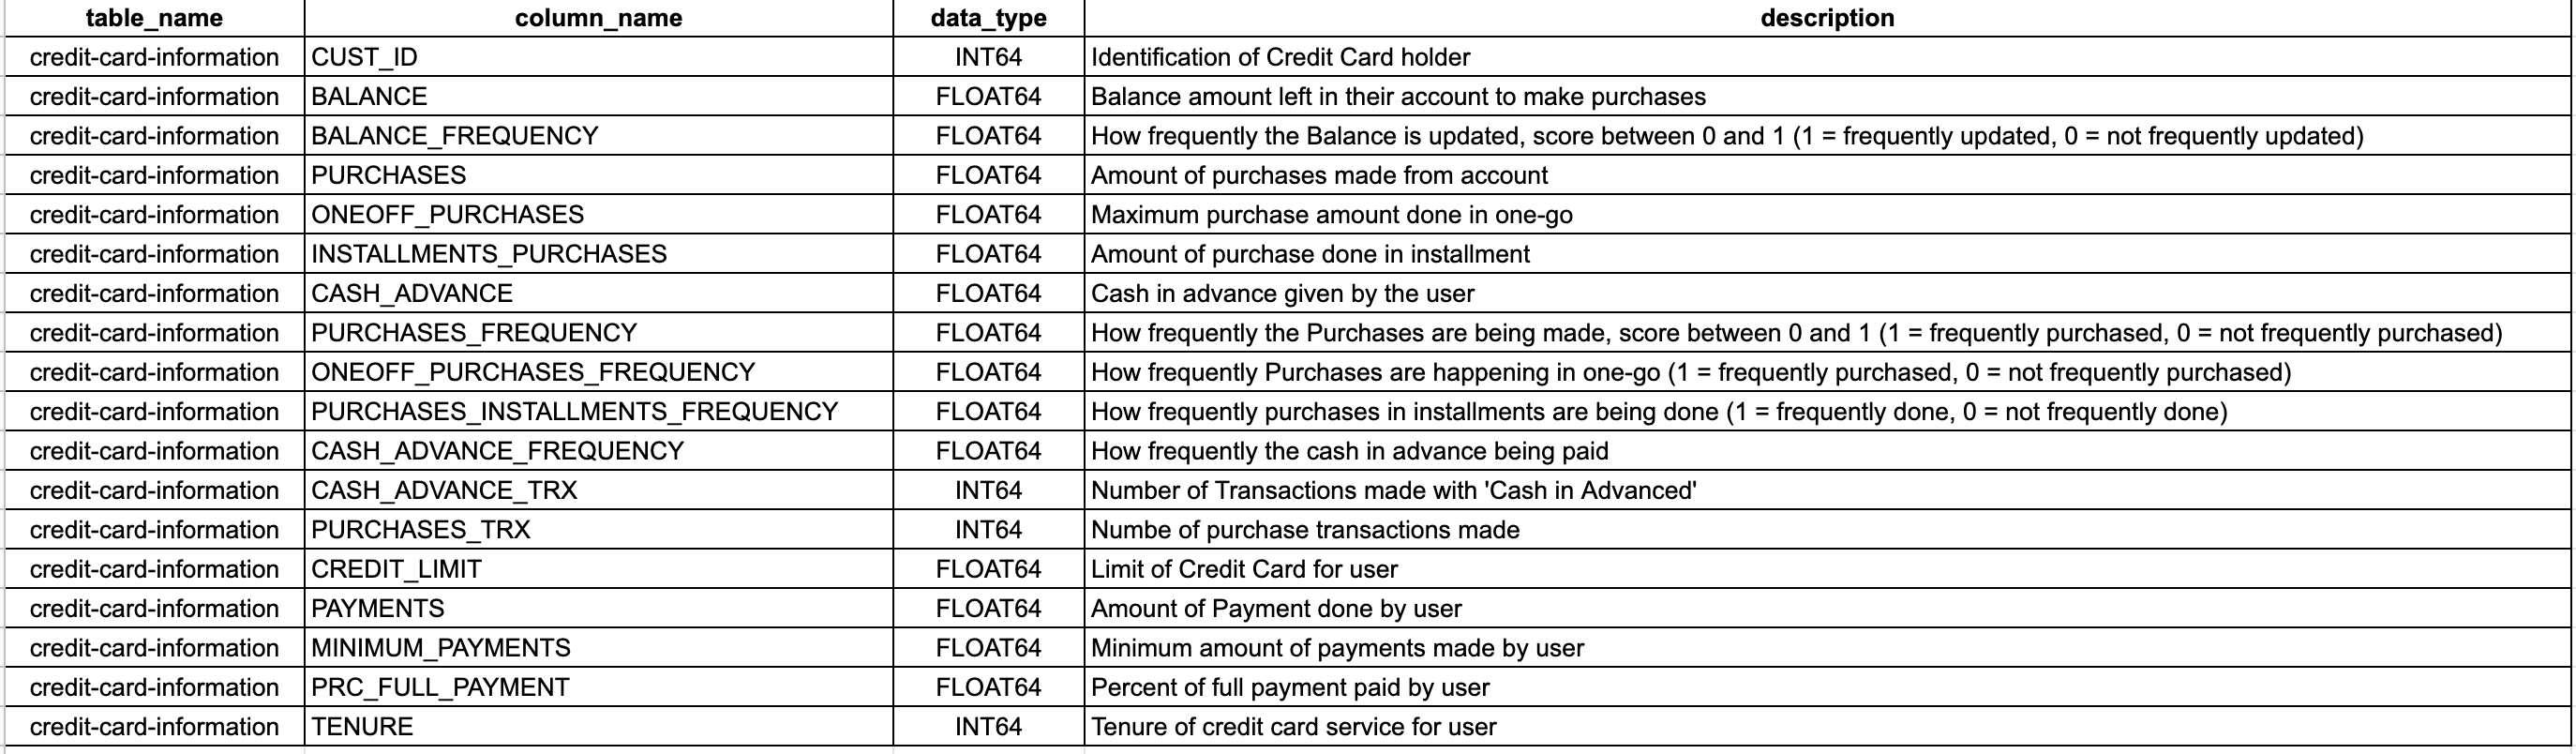

Berikut penjelasan terkait data di tiap kolomya

# **5 - Exploratory Data Analysis (EDA)**

---

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



In [5]:
# Show 10 data awal
copyData.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


Berikut 10 data awal sesuai instruksi

In [6]:
# Show 10 data akhir
copyData.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


Berikut 10 data akhir sesuai instruksi

In [7]:
# Cek data CUST_ID sudah bernilai genap
copyData.CUST_ID.unique()

array([ 788, 1902, 2322, ..., 4296, 4476, 3564])

Data yang diambil sudah sesuai instruksi dimana batch 018 adalah genap, maka data `CUST_ID` yang diambil juga genap.

In [8]:
# cek data for beginning insight
copyData.describe().T 

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4476.000000,2583.931114,2.000000,2239.000000,4476.000000,6713.000000,8950.000000
BALANCE,4475.0,1565.743939,2091.205727,0.000000,132.536353,874.905296,2058.519163,19043.138560
BALANCE_FREQUENCY,4475.0,0.877608,0.235604,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,4475.0,1003.158324,2210.812899,0.000000,40.065000,362.480000,1122.640000,49039.570000
ONEOFF_PURCHASES,4475.0,588.504849,1666.500287,0.000000,0.000000,29.990000,580.320000,40761.250000
INSTALLMENTS_PURCHASES,4475.0,415.025075,927.360842,0.000000,0.000000,89.450000,484.255000,22500.000000
CASH_ADVANCE,4475.0,973.453671,2133.464502,0.000000,0.000000,0.000000,1098.569962,29282.109150
PURCHASES_FREQUENCY,4475.0,0.490122,0.399874,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202614,0.298502,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.364989,0.397336,0.000000,0.000000,0.166667,0.750000,1.000000


Insight awal yang dapat diambil dari statistik diatas adalah rata-rata para pelanggan menggunakan kartu kredit untuk berbelanja sebesar **$ 1.003** dan `CASH_ADVANCE` sebesar **$ 974**. Kebanyakan dari pelanggan juga menggunakan `TENURE` 12 sebagai opsi pembayarannya. Dengan `MINIMUM_PAYMENTS` diangka **$ 854**

In [9]:
# Check data info
copyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

data sebanyak `4475` baris dan `18` kolom, ada missing value di `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS` yang akan di handle kemudian

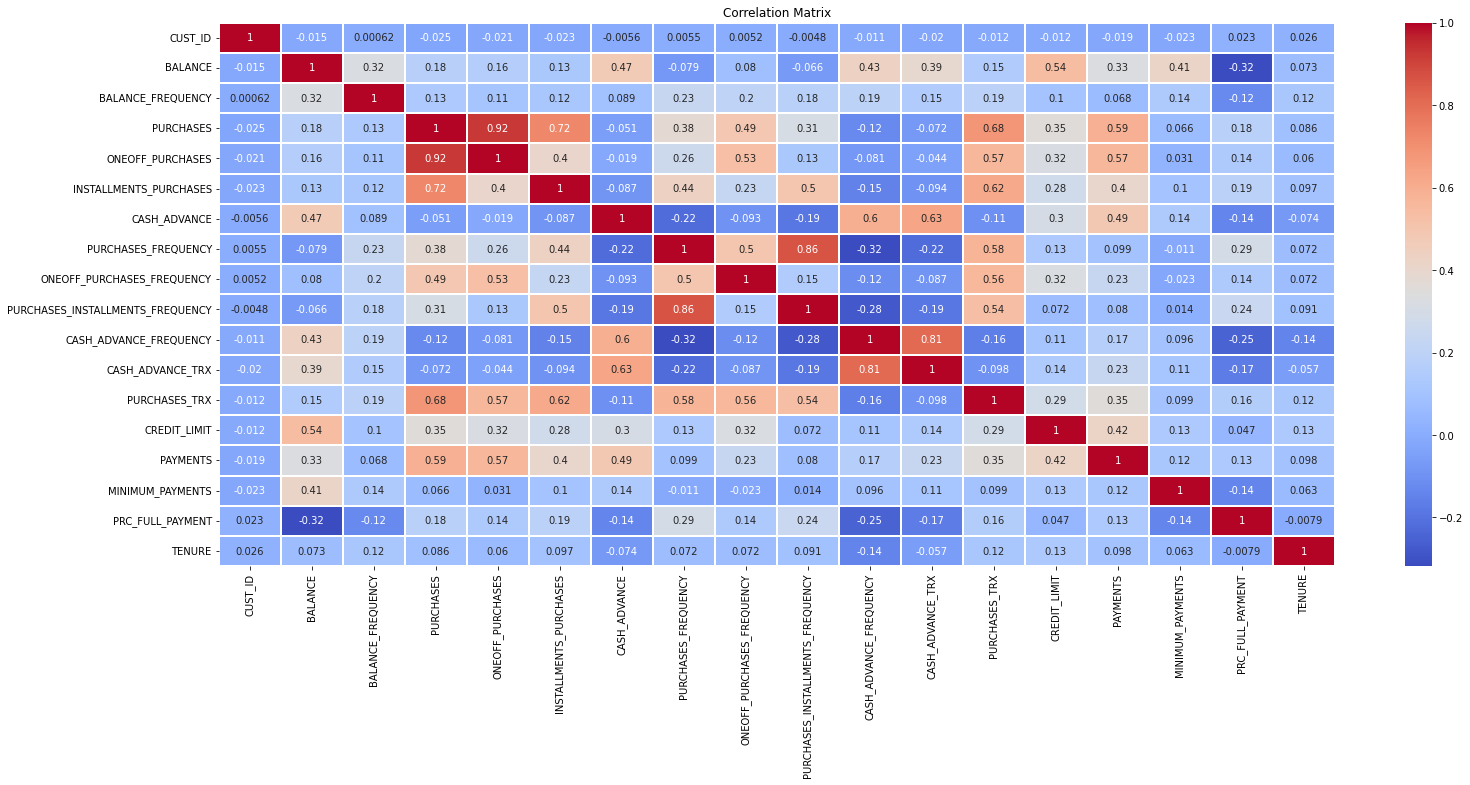

In [10]:
plt.figure(figsize=(25, 10))
sns.heatmap(copyData.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

Berikut korelasi data antar table dengan korelasi tertinggi sebesar `59%` data `CREDIT_LIMIT` dengan `PURCHASES`, bisa diartikan jika memang benar pelanggan menggunakan kartu kreditnya maka pelanggan juga komitmen terhadap pembayarannya.

In [11]:
# Payment with tenure
copyData.groupby((copyData['INSTALLMENTS_PURCHASES'] >= 1000) & (copyData['INSTALLMENTS_PURCHASES'] <= 10000))['TENURE'].value_counts()

INSTALLMENTS_PURCHASES  TENURE
False                   12        3278
                        11         162
                        10         108
                        6          102
                        7           96
                        8           95
                        9           82
True                    12         529
                        9            6
                        10           6
                        7            4
                        11           4
                        8            2
                        6            1
Name: TENURE, dtype: int64

Para pelanggan memilih `TENURE` 12 sebagai opsi pembayaran atas tagihannya dengan total sebanyak **529** orang

In [12]:
# Cash Advance VS Tenure
copyData.loc[(copyData['ONEOFF_PURCHASES'] >= 3000)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
55,3814,939.152528,1.000000,3393.25,3364.59,77.66,0.000000,0.250000,0.250000,0.083333,0.000000,0,5,9000.0,2768.821579,267.093439,0.000000,12
57,4020,452.951976,0.454545,3649.83,3649.83,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,10,7500.0,209.217046,164.503829,0.000000,12
134,812,311.341555,0.909091,3721.39,3721.39,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,26,4000.0,4004.905569,156.580586,0.714286,12
192,4734,336.749543,0.818182,3081.69,3081.69,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,22,2000.0,3631.007239,133.854497,0.000000,12
209,5768,616.570241,0.818182,5788.81,5788.81,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,13,7000.0,5891.252034,285.762299,0.200000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,1686,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12
4245,5318,1060.385693,1.000000,5327.61,5327.61,0.00,3467.977927,0.833333,0.833333,0.000000,0.583333,12,53,6000.0,8412.649548,247.085679,0.900000,12
4260,210,9303.557117,1.000000,6133.01,4045.67,2087.34,1895.608770,1.000000,1.000000,1.000000,0.833333,23,115,12500.0,4054.579469,2998.465025,0.000000,12
4263,6646,14100.251100,1.000000,4995.80,3403.11,1592.69,20712.670080,1.000000,1.000000,0.333333,0.833333,36,34,16500.0,20418.332380,21235.065300,0.000000,12


Berikut adalah 175 pelanggan yang menggunakan kartunya kreditnya diatas **$ 3.000** dalam 1 kali transaksi. Nominal yang cukup besar tetapi mungkin para pelanggan ini akan menjadikan cicilan sebagai opsi pembayarannya.

In [13]:
# Cash Advance VS Tenure
copyData.loc[(copyData['TENURE'] >= 10)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
9,24,0.004816,0.545455,51.70,0.00,51.70,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,3000.0,33.249088,0.059481,0.000000,12
10,172,867.728471,1.000000,41.07,0.00,41.07,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,3000.0,1409.282903,233.788637,0.000000,12
11,190,41.255670,0.454545,297.40,297.40,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,5,6000.0,595.460601,173.255085,0.333333,12
12,206,857.767403,1.000000,639.56,0.00,639.56,0.000000,0.250000,0.000000,0.250000,0.000000,0,4,2200.0,210.272469,254.976679,0.000000,12
13,374,5850.172900,1.000000,393.87,0.00,393.87,0.000000,0.250000,0.000000,0.250000,0.000000,0,8,6000.0,1536.774213,2668.340809,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


Ada **4.087** pelanggan yang memlilih `TENURE` diatas 9 untuk opsi pelunasan tagihannya.

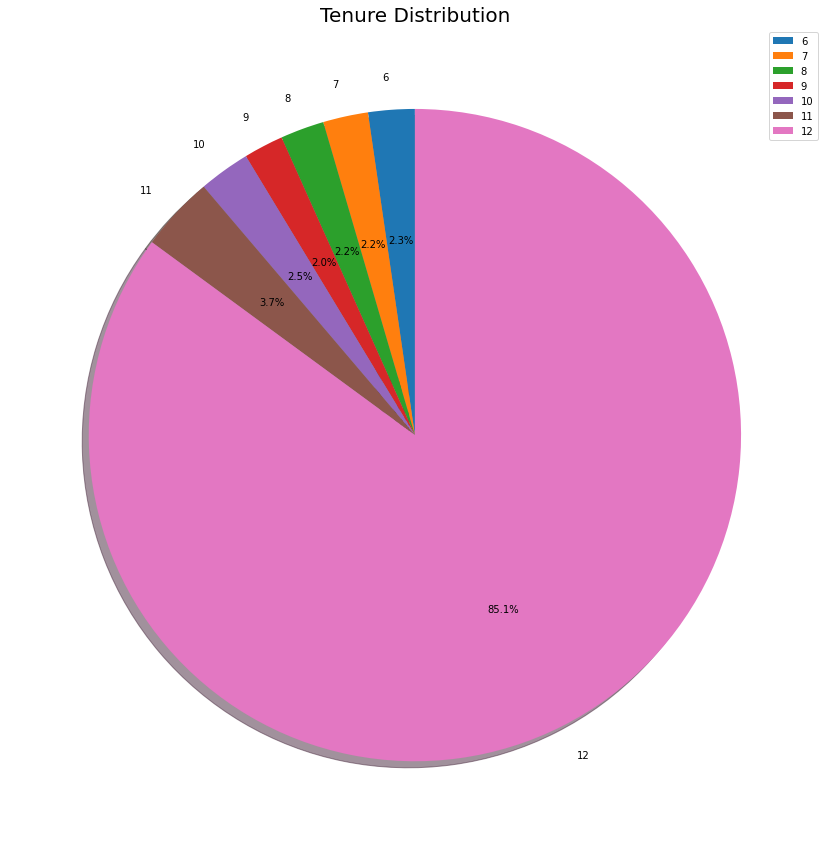

In [14]:
# TENURE Percentage
tenureData = copyData.groupby('TENURE').size()
plt.figure(figsize = (30, 15))
plt.pie(tenureData, labels = tenureData.index, shadow = True, startangle = 90, autopct='%1.1f%%')
plt.title('Tenure Distribution', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Berkolerasi dari EDA sebelumnya, ada **85%** pelanggan yang memilih `TENURE` 12 sebagai opsi pembayaran sedangkan yang terendah ada di `TENURE` 9 dengan nilai **2%** dari total pelanggan.

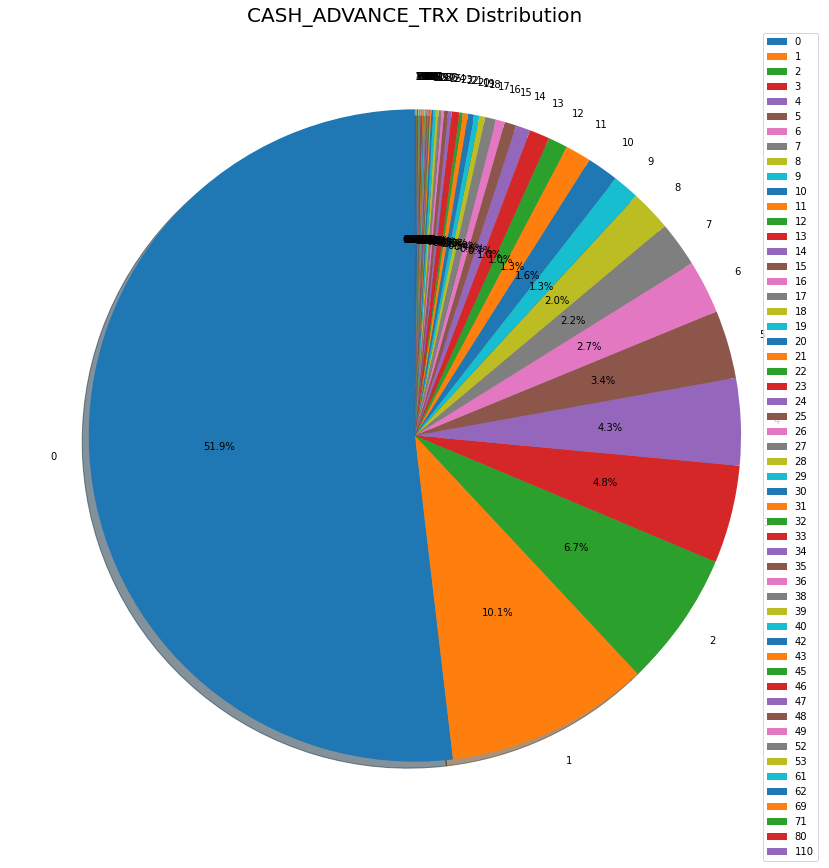

In [65]:
# CASH_ADVANCE_TRX Percentage
tenureData = copyData.groupby('CASH_ADVANCE_TRX').size()
plt.figure(figsize = (30, 15))
plt.pie(tenureData, labels = tenureData.index, shadow = True, startangle = 90, autopct='%1.1f%%')
plt.title('CASH_ADVANCE_TRX Distribution', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Sebanyak **52%** dari pelanggan yang tidak melakukan `CASH_ADVANCE`

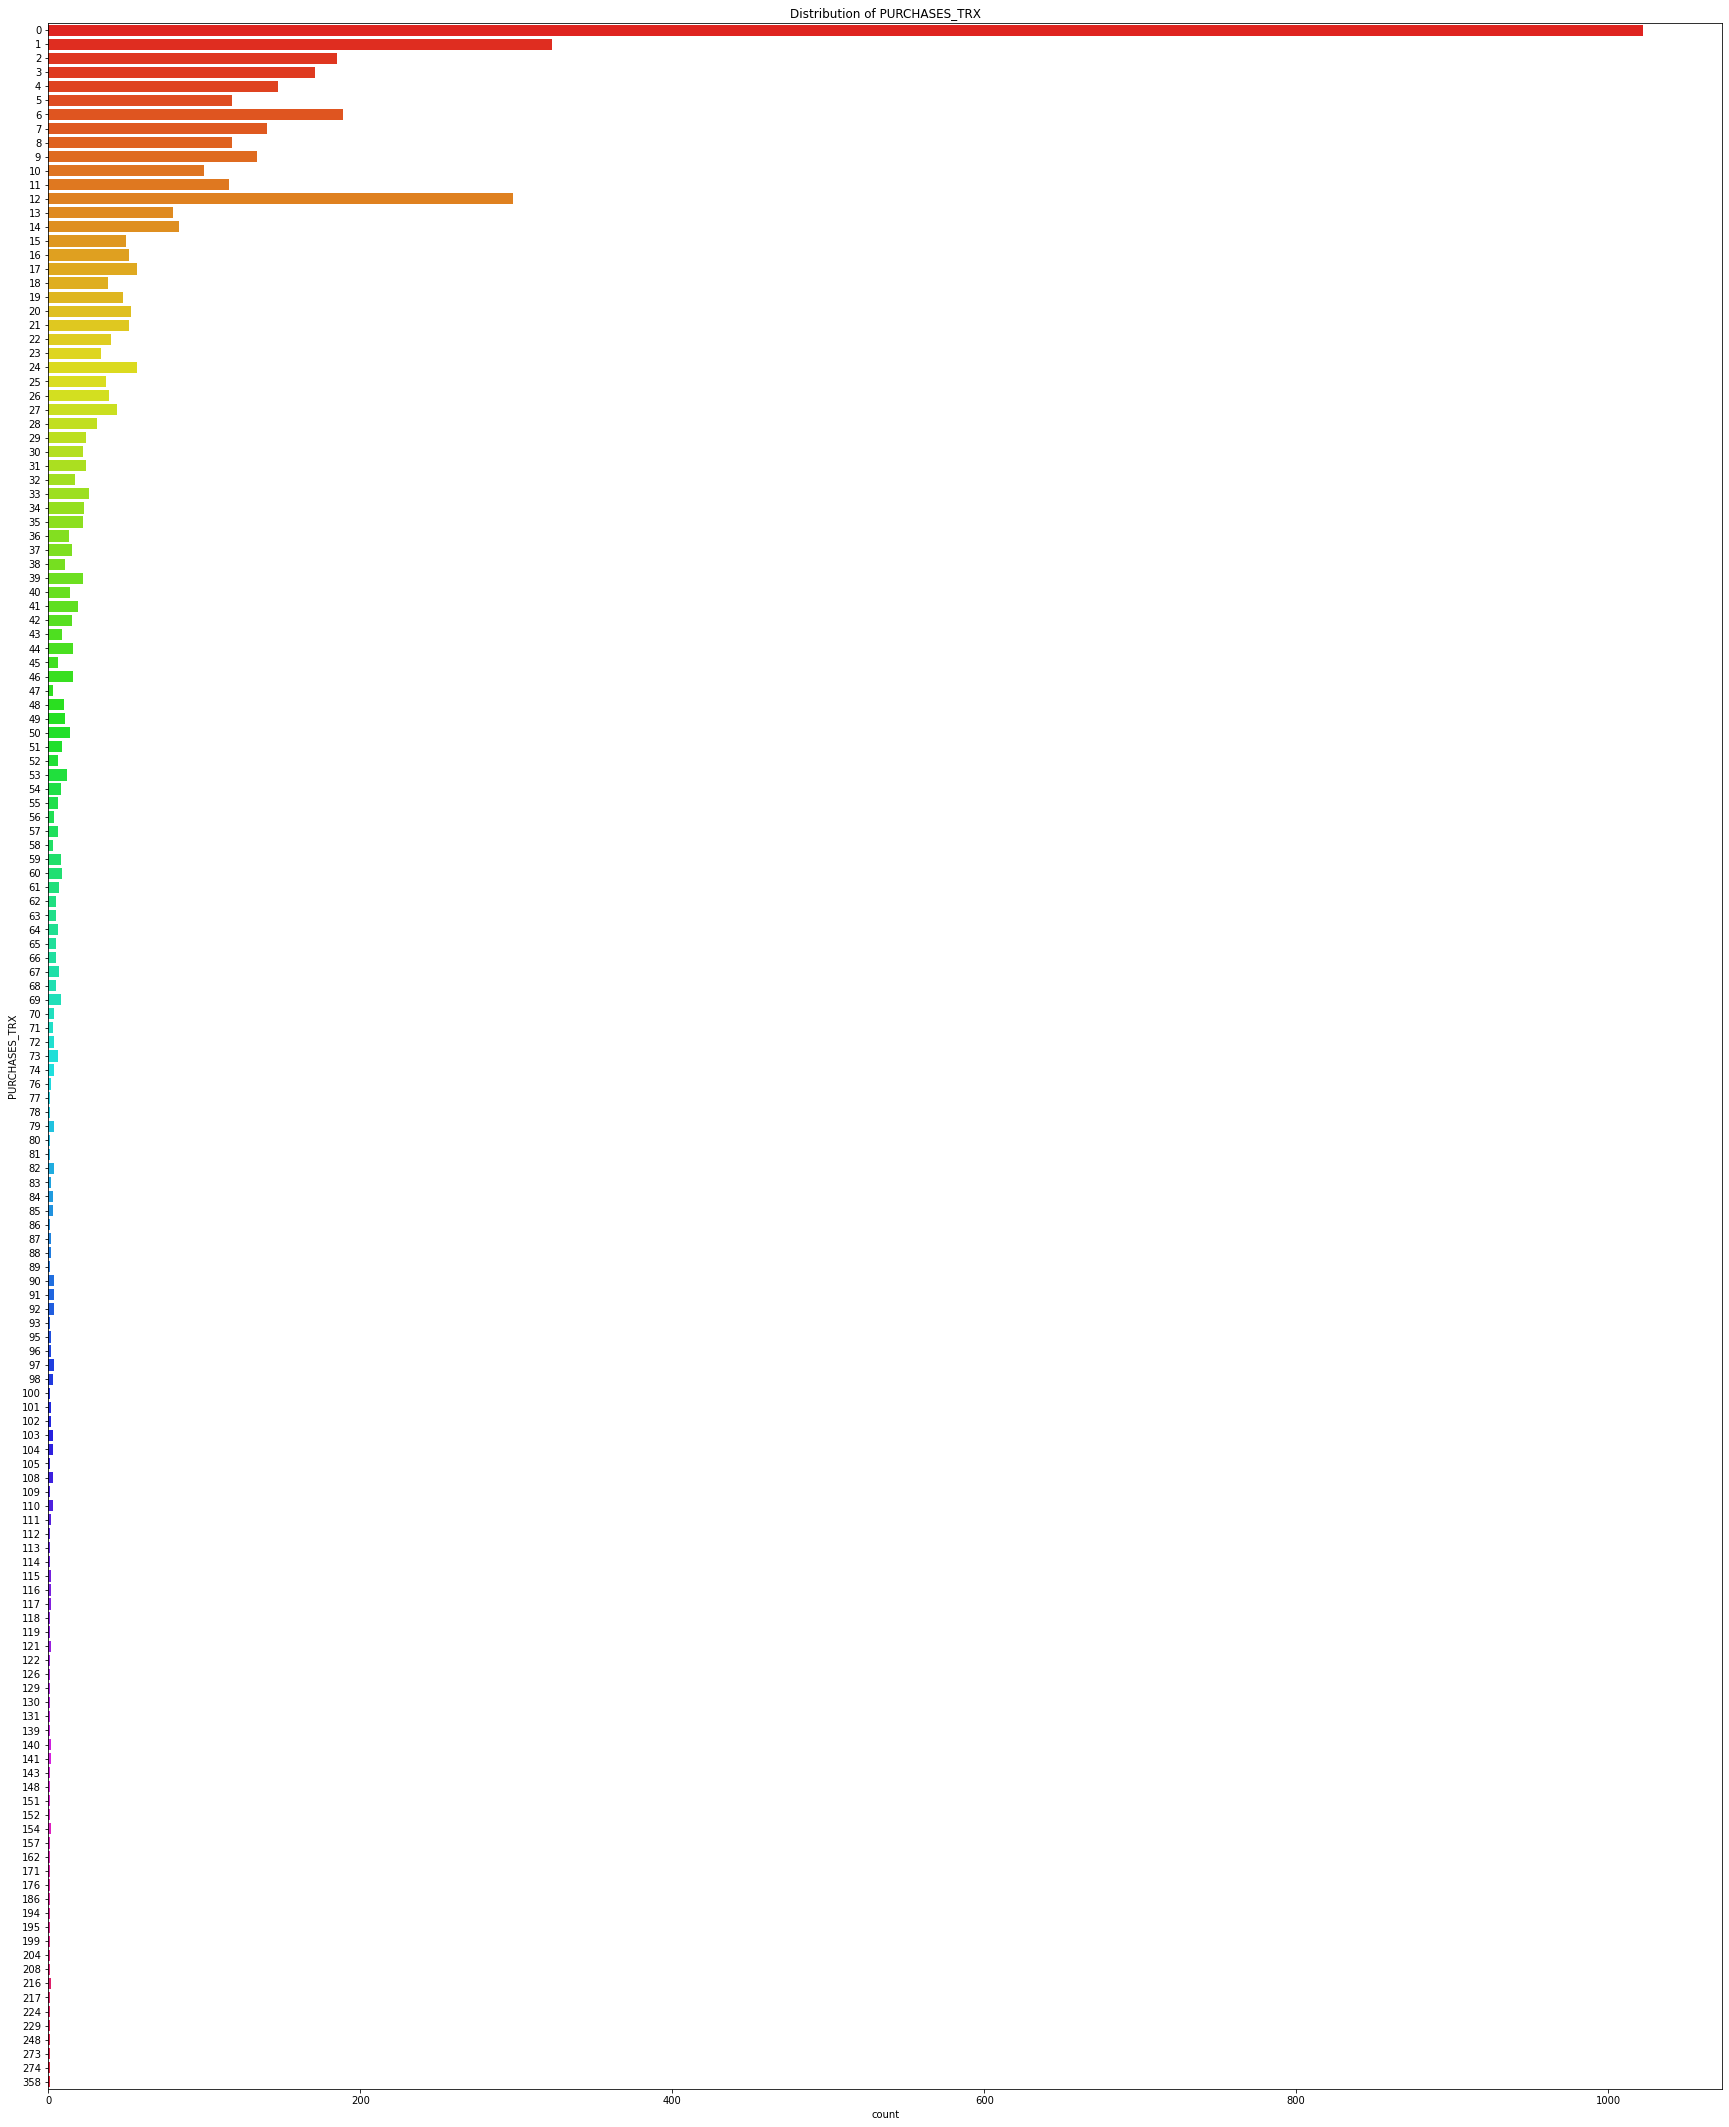

In [16]:
# PURCHASES_TRX visualization
plt.rcParams['figure.figsize'] = (30, 38)
sns.countplot(y = copyData['PURCHASES_TRX'], palette = 'hsv')
sns
plt.title('Distribution of PURCHASES_TRX')
plt.show()

Ada +- 1000 pelanggan yang belum pernah menggunakan kartu kreditnya untuk bertransaksi

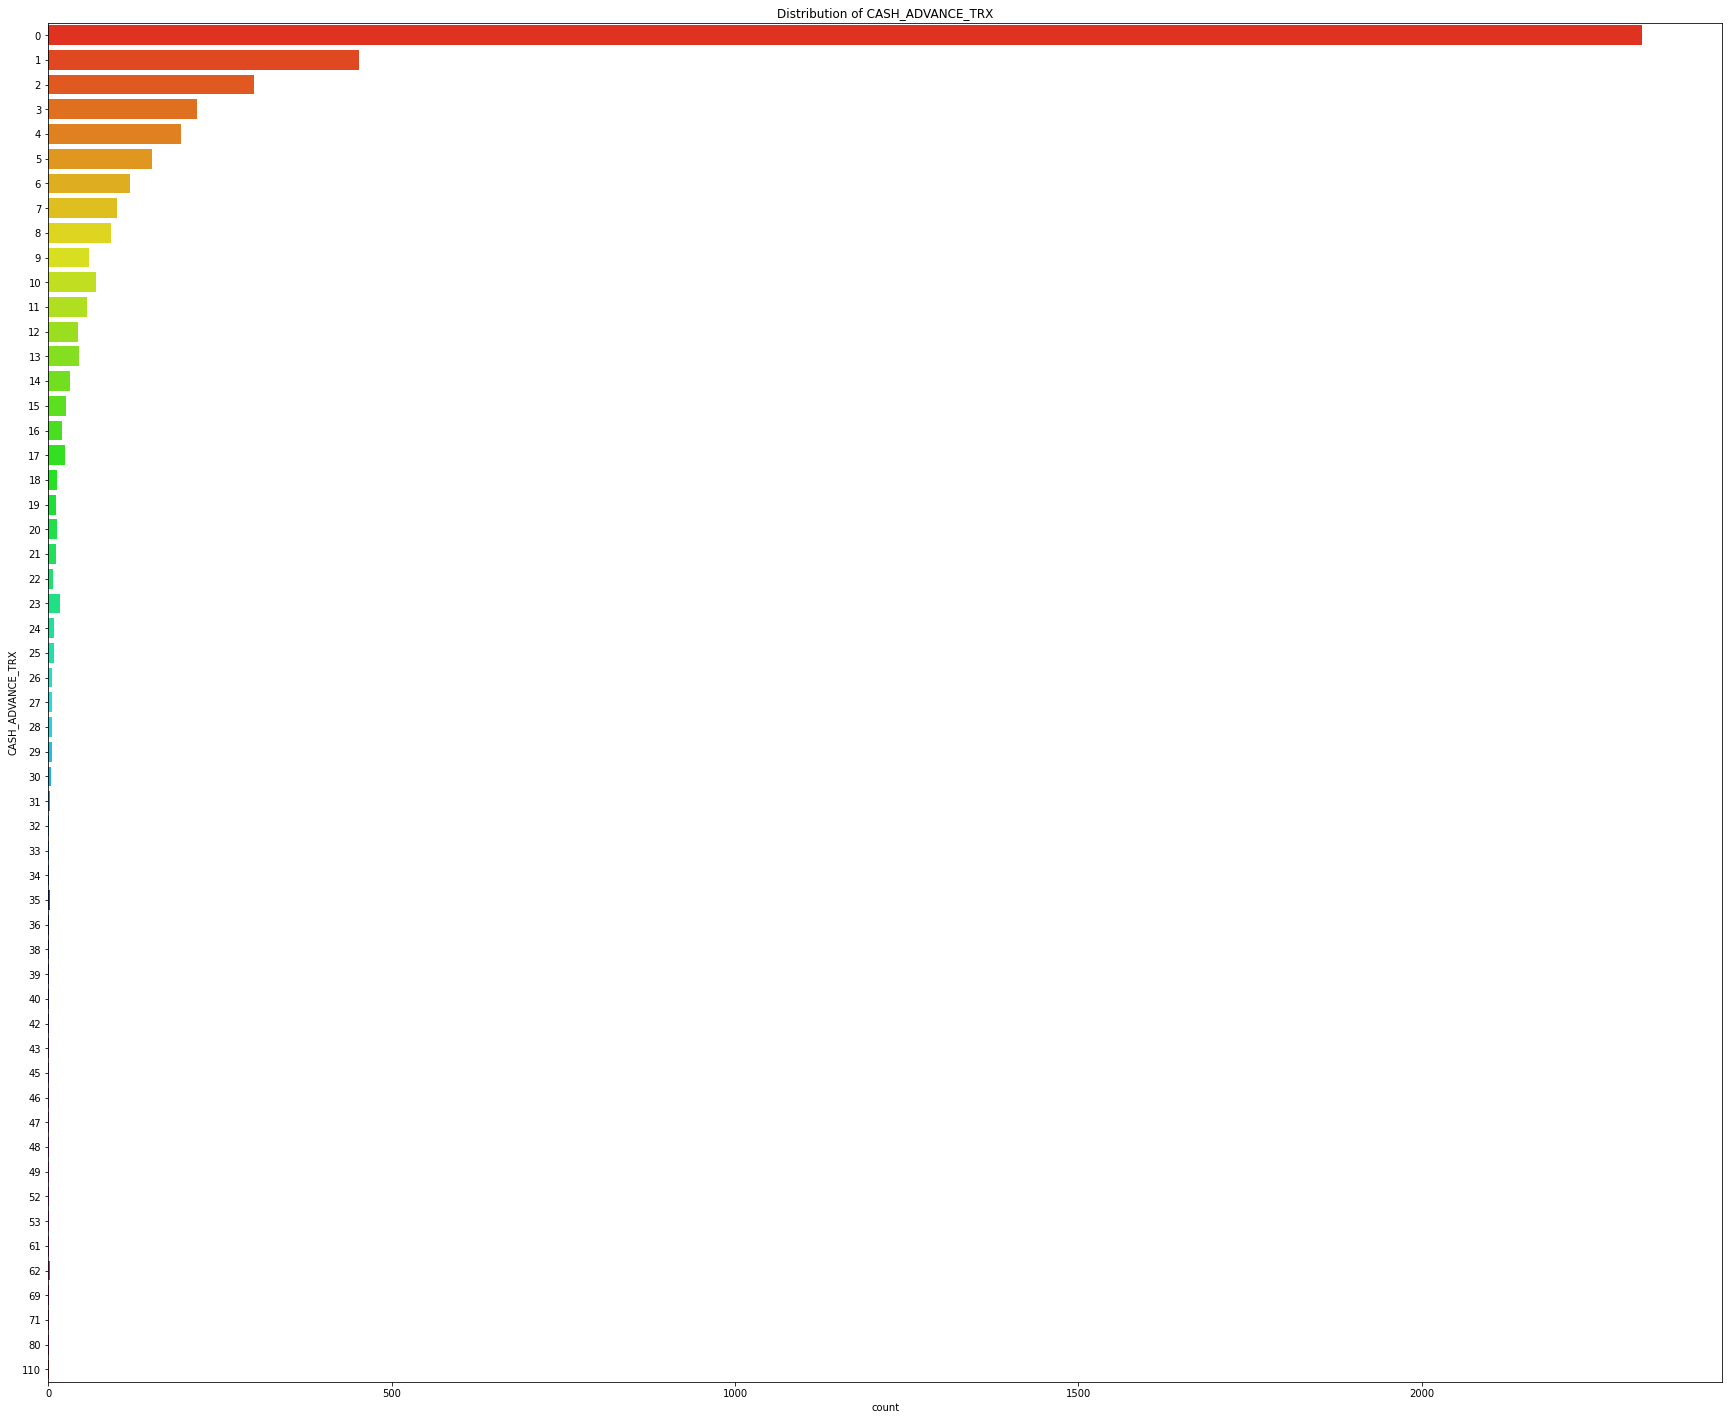

In [66]:
# CASH_ADVANCE_TRX visualization
plt.rcParams['figure.figsize'] = (30, 25)
sns.countplot(y = copyData['CASH_ADVANCE_TRX'], palette = 'hsv')
sns
plt.title('Distribution of CASH_ADVANCE_TRX')
plt.show()

Ada sekitar 3000 pelanggan yang juga belum pernah menggunakan kartu kreditnya sebagai `CASH_ADVANCE`

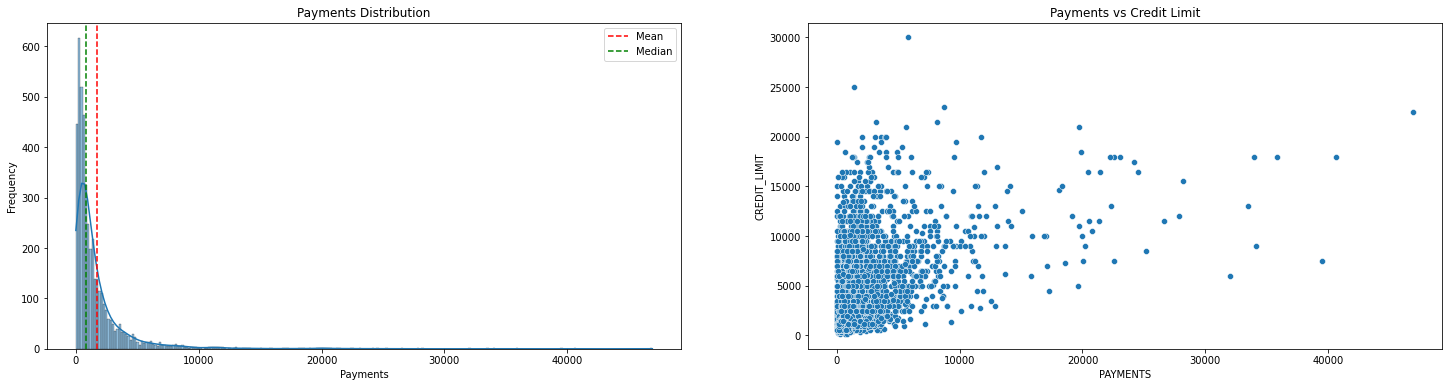

Skewness of Payment : 6.040773400922328
Mean of Payment     : 1726.2122738256985
Median of Payment   : 831.048408


In [18]:
# Payment vs credit limit visualization
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='PAYMENTS', data=copyData, kde=True)
plt.axvline(x=copyData.PAYMENTS.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=copyData.PAYMENTS.median(), color='green', linestyle='--', label='Median')
plt.title('Payments Distribution')
plt.xlabel('Payments')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.scatterplot(x='PAYMENTS', y='CREDIT_LIMIT', data=copyData)
plt.title('Payments vs Credit Limit')
plt.show()
print(f'Skewness of Payment : {copyData.PAYMENTS.skew()}')
print(f'Mean of Payment     : {copyData.PAYMENTS.mean()}')
print(f'Median of Payment   : {copyData.PAYMENTS.median()}')

Nilai skewness dari data payment sangat besar, yaitu **6.041**, dan rata-rata pembayaran dari pelanggan cukup besar, yaitu **1726.21**. Hubungan dari `PAYMENTS` dan `CREDIT_LIMIT` cukup besar, yaitu senilai **59%**

Text(0, 0.5, 'Purchases Trx')

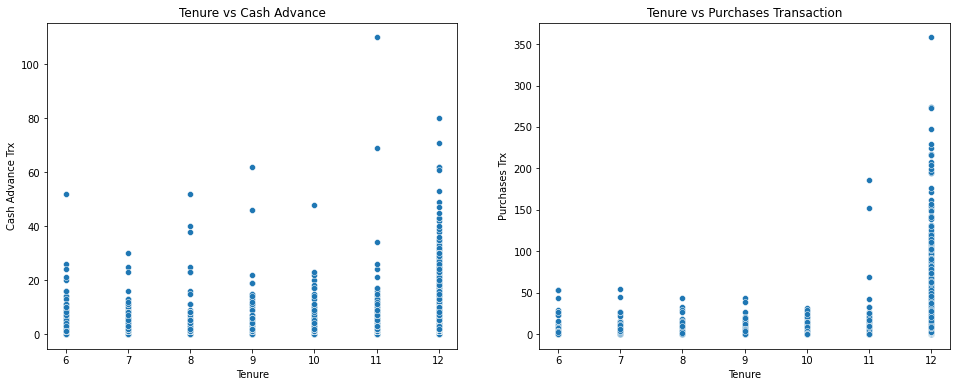

In [19]:
# Visualization between cash advance and purchases vs tenure
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='TENURE', y='CASH_ADVANCE_TRX', data=copyData)
plt.title('Tenure vs Cash Advance')
plt.xlabel('Tenure')
plt.ylabel('Cash Advance Trx')
plt.subplot(1, 3, 2)
sns.scatterplot(x='TENURE', y='PURCHASES_TRX', data=copyData)
plt.title('Tenure vs Purchases Transaction')
plt.xlabel('Tenure')
plt.ylabel('Purchases Trx')

Visualisasi diatas dapat diartikan untuk customer yang melakukan cash advance paling banyak memjadikan tenor 12 sebagai pilihan dalam membayarnya. berbanding lurus juga dengan customer yang berbelanja paling banyak menjadikan tenor 12 sebagai pilihan dalam metode pelunasannya.

Text(0, 0.5, 'Purchases Trx')

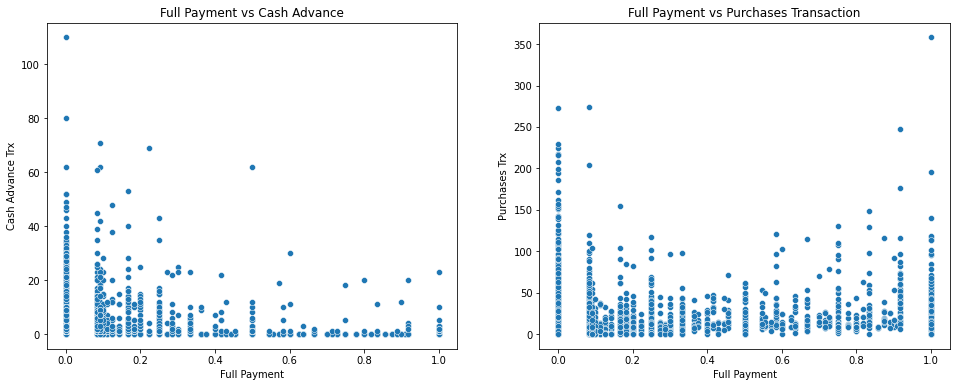

In [20]:
# Visualization between cash advance and purchases vs full payment
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='PRC_FULL_PAYMENT', y='CASH_ADVANCE_TRX', data=copyData)
plt.title('Full Payment vs Cash Advance')
plt.xlabel('Full Payment')
plt.ylabel('Cash Advance Trx')
plt.subplot(1, 3, 2)
sns.scatterplot(x='PRC_FULL_PAYMENT', y='PURCHASES_TRX', data=copyData)
plt.title('Full Payment vs Purchases Transaction')
plt.xlabel('Full Payment')
plt.ylabel('Purchases Trx')

Untuk customer yang melakukan cash advance, banyak dari mereka yang memilih untuk melakukan untuk mencicil cash advance yang mereka lakukan. ini dilihat pada grafik bahwa data > 0(tidak) itu lebih banyak dibanding dengan data = 0(tidak). Hal ini pun terjadi pada customer yang melakukan pembelanjaan. Banyak dari mereka yang memilih menjadikan cicilan sebagai opsi pembayaran mereka.

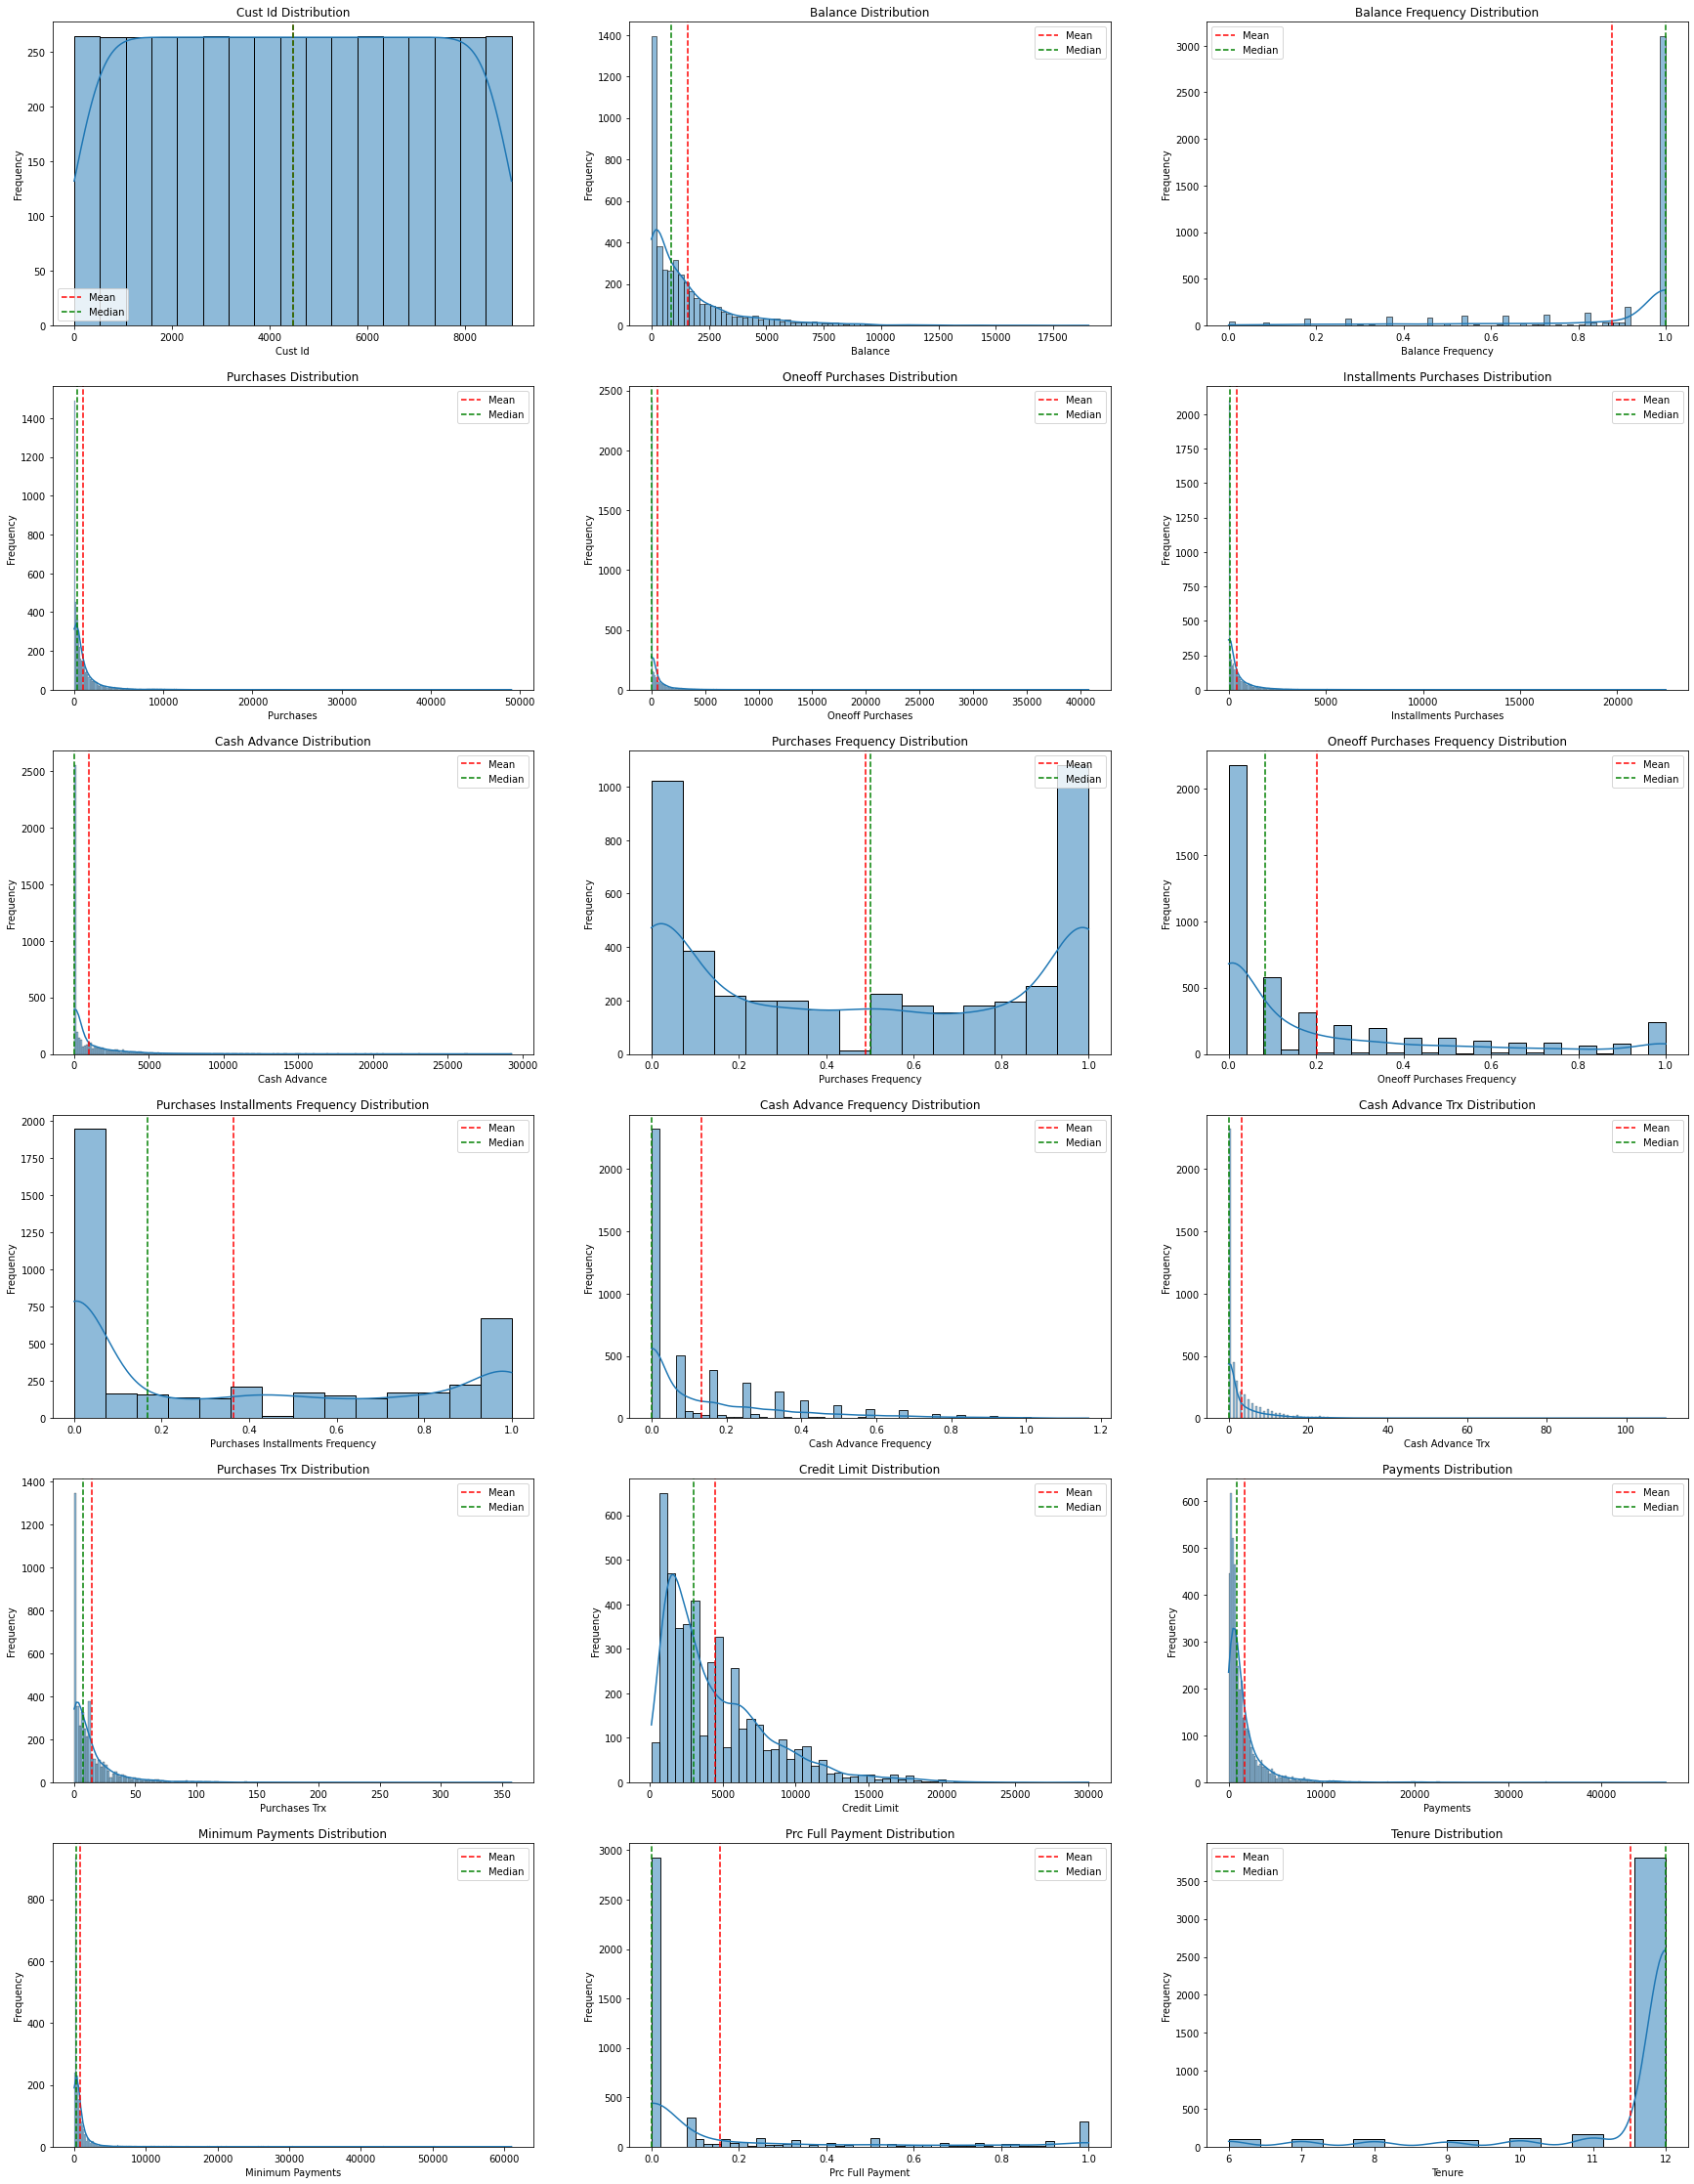

In [21]:
# Data distribution visualization
plt.figure(figsize=(30, 40))
for col in copyData.columns:
    plt.subplot(6, 3, copyData.columns.get_loc(col) + 1)
    sns.histplot(x=col, data=copyData, kde=True)
    plt.axvline(x=copyData[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(x=copyData[col].median(), color='green', linestyle='--', label='Median')
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.legend()
plt.show()

Hampir semua data diatas cenderung skew, kecuali data PURCHASES dan PURCHASES_INSTALLMENTS yang cenderung normal distribution

# **6. Data Preprocessing**

---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 6.1 Split data between Train and Test

In [22]:
# Split data
train, test = train_test_split(copyData, test_size = 0.1, random_state = 19) 

# Check data shape
print('Shape of data Train  : ', train.shape)
print('Shape of data Test   : ', test.shape)

# Display
train

Shape of data Train  :  (4027, 18)
Shape of data Test   :  (448, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1430,3538,93.427011,0.800000,772.80,772.80,0.00,0.000000,0.600000,0.600000,0.0,0.000000,0,9,1200.0,850.955500,104.163023,1.000000,10
2496,2466,4862.641586,1.000000,1302.37,1302.37,0.00,1279.629012,0.500000,0.500000,0.0,0.250000,3,9,6000.0,1723.432154,1836.602896,0.000000,12
3751,640,1280.732187,1.000000,0.00,0.00,0.00,395.725602,0.000000,0.000000,0.0,0.166667,4,0,1500.0,397.461163,380.286525,0.000000,12
885,5418,700.100691,1.000000,7244.98,2457.47,4787.51,0.000000,1.000000,0.833333,1.0,0.000000,0,110,6200.0,6151.929937,197.284410,0.750000,12
3315,8608,1175.895992,1.000000,154.38,154.38,0.00,37.197366,0.083333,0.083333,0.0,0.083333,1,2,4000.0,1909.161919,426.237080,0.083333,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6010,158.512412,0.454545,713.64,713.64,0.00,0.000000,0.083333,0.083333,0.0,0.000000,0,2,3000.0,1121.322787,96.145734,0.000000,12
1043,7292,94.604491,1.000000,816.00,0.00,816.00,0.000000,1.000000,0.000000,1.0,0.000000,0,12,2500.0,694.054946,154.937506,0.416667,12
1378,7060,284.510677,0.818182,83.20,83.20,0.00,0.000000,0.083333,0.083333,0.0,0.000000,0,1,6500.0,1033.943290,146.825436,0.090909,12
757,3990,64.491497,1.000000,855.99,0.00,855.99,0.000000,1.000000,0.000000,0.7,0.000000,0,12,3000.0,816.582936,122.653219,1.000000,10


Berikut pembagian data train dan test, untuk data train sebesar 90% dengan total **4.027** data dan data test 10% dengan total **448** data

## 6.2 Missing Value

In [23]:
# Check missing value
print('Missing value data Train : ')
print(train.isnull().sum())
print('')
print('Missing value data Test  : ')
print(test.isnull().sum())

Missing value data Train : 
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    147
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Missing value data Test  : 
CUST_ID                              0
BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PU

Data missing value pada train ada sebanyak 147 di kolom `MINIMUM_PAYMENT` dan pada data test ada di kolom `CREDIT_LIMIT` sebanyak 1 dan `MINIMUM_PAYMENT` sebanyak 11 ada di data test

In [24]:
# Cek missing value data train
train[train.MINIMUM_PAYMENTS.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
941,6092,3946.421177,1.000000,1508.54,1508.54,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,16,8500.0,0.000000,NaN,0.0,12
1482,3940,0.000000,0.000000,120.00,0.00,120.00,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,4000.0,140.890144,NaN,0.0,12
2850,6196,312.197634,0.181818,0.00,0.00,0.00,5104.121726,0.000000,0.000000,0.000000,0.181818,8,0,8000.0,0.000000,NaN,0.0,11
2228,5404,0.000000,0.000000,45.53,0.00,45.53,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,2500.0,0.000000,NaN,0.0,12
2110,4910,19.354559,0.909091,689.70,0.00,689.70,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,10000.0,746.691026,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,4066,176.721561,1.000000,1707.26,403.54,1303.72,0.000000,0.916667,0.083333,0.833333,0.000000,0,18,3300.0,0.000000,NaN,0.0,12
2773,8134,5837.105453,1.000000,3488.49,3262.25,226.24,3303.152300,1.000000,1.000000,0.500000,0.750000,15,46,7900.0,0.000000,NaN,0.0,12
1437,412,150.351606,1.000000,352.92,352.92,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,4,3100.0,0.000000,NaN,0.0,12
1840,4076,10.652530,0.181818,209.20,0.00,209.20,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,500.0,0.000000,NaN,0.0,12


Berikut adalah missing value di `MINIMUM_PAYMENTS`, saya berasumsi para pelanggan ini adalah mereka yang membayar penuh terhadap tagihan, maka data di `MINIMUM_PAYMENTS` menjadi hilang. maka saya akan menggantinya dengan nilai = 0

In [25]:
# Check describe
train[train.MINIMUM_PAYMENTS.isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,147.0,4568.258503,2471.621300,14.0,2226.000000,4608.000000,6757.000000,8898.000000
BALANCE,147.0,643.797701,1282.116121,0.0,0.515667,23.150437,462.025897,6059.861762
BALANCE_FREQUENCY,147.0,0.400616,0.410085,0.0,0.090909,0.181818,1.000000,1.000000
PURCHASES,147.0,419.473197,917.008226,0.0,0.000000,125.370000,385.425000,7597.090000
ONEOFF_PURCHASES,147.0,262.746122,743.900223,0.0,0.000000,0.000000,179.310000,6761.290000
INSTALLMENTS_PURCHASES,147.0,156.727075,348.824289,0.0,0.000000,0.000000,165.900000,2959.240000
CASH_ADVANCE,147.0,606.400493,1209.036593,0.0,0.000000,0.000000,548.131157,6523.780195
PURCHASES_FREQUENCY,147.0,0.343844,0.381448,0.0,0.000000,0.166667,0.666667,1.000000
ONEOFF_PURCHASES_FREQUENCY,147.0,0.123491,0.266232,0.0,0.000000,0.000000,0.083333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,147.0,0.242599,0.351881,0.0,0.000000,0.000000,0.375000,1.000000


Berkorelasi dari EDA sebelumnya, hal ini dibuktikan dengan data di kolom `PAYMENTS` yang menyatakan nilai minimumnya adalah 0

In [26]:
# Check missing value data train
train[train.CREDIT_LIMIT.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3843,4956,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Dari statistic terhadap data train dan test dapat disimpulkan bahwa missing value yang ada pada `MINIMUM_PAYMENTS` itu terjadi karena banyak dari customer yang melakukan pembayaran full terhadap tagihan, hal ini dilihat bahwa `PRC_FULL_PAYMENT` di nilai 0%, saya akan handle missing value tersebut dengan menginput nilai = 0 pada data train dan data testnya. Sedangkan saya akan mendrop missing value `CREDIT_LIMIT` pada data test. karena hanya ada 1 data yang missing

In [27]:
# Input 0 to missing value for train and test
train['MINIMUM_PAYMENTS'].fillna(value=0, inplace=True)
test['MINIMUM_PAYMENTS'].fillna(value=0, inplace=True)

# Drop missing value in CREDIT_LIMIT
train = train.dropna(subset=['CREDIT_LIMIT'])

In [28]:
# Check missing value
print('Missing value data Train : ')
print(train.isnull().sum())
print('')
print('Missing value data Test  : ')
print(test.isnull().sum())

Missing value data Train : 
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Missing value data Test  : 
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE      

Missing value berhasil di handle

## 6.3 Outlier Handling

Pada bagan ini, asumsi saya :
1. jika outlier < 5%, akan saya drop
2. jika outlier sampai dengan 30% akan saya handle dengan capping
3. jika outlier > 30% akan saya biarkan.

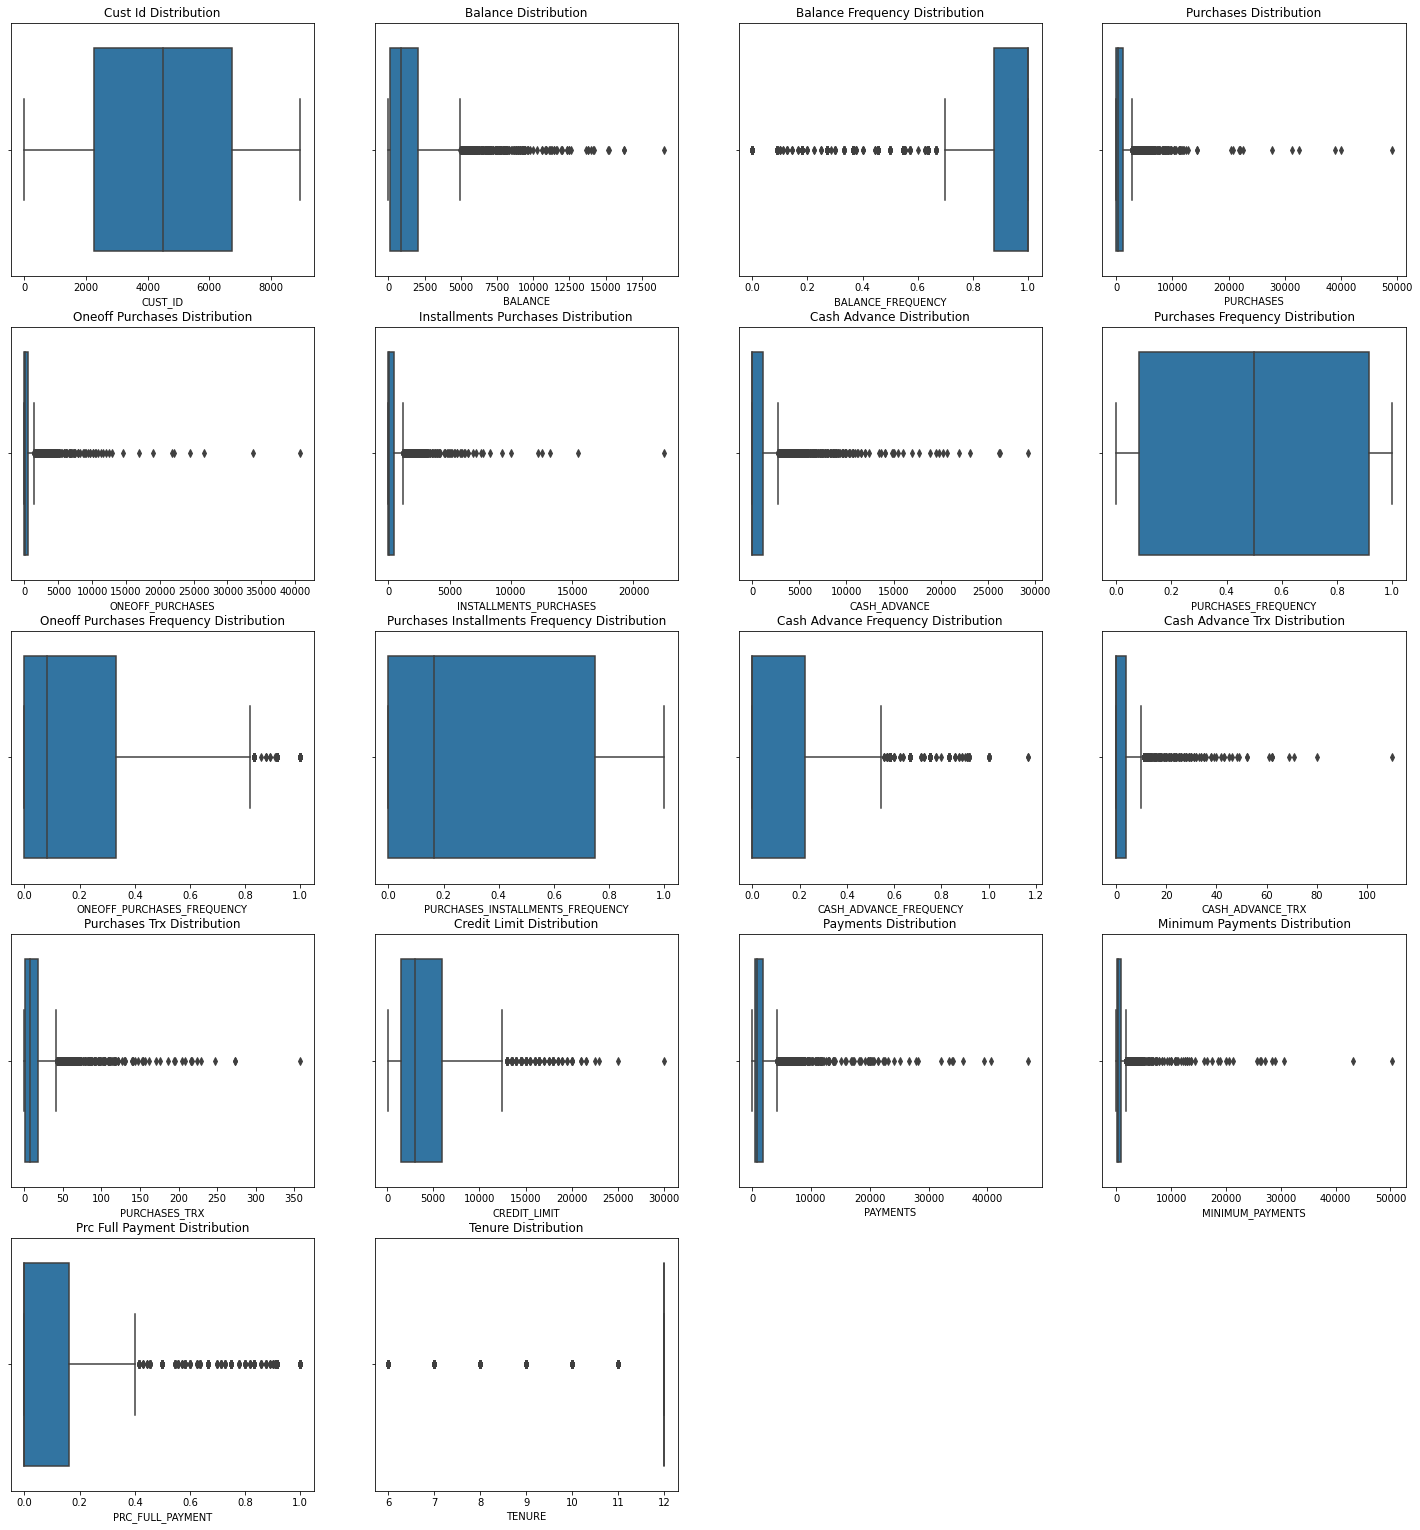

In [29]:
# Check outlier with visualization
plt.figure(figsize=(25, 27))
for col in train.columns:
    plt.subplot(5, 4, copyData.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=train)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

In [30]:
# Outlier function recognition
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [31]:
# Outlier percentage dataframe
cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 
        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
        'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(train, cols[i]).shape[0] / train.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,BALANCE,92.40
1,BALANCE_FREQUENCY,83.66
2,PURCHASES,91.58
3,ONEOFF_PURCHASES,89.22
4,INSTALLMENTS_PURCHASES,90.61
5,CASH_ADVANCE,88.45
6,PURCHASES_FREQUENCY,100.00
7,ONEOFF_PURCHASES_FREQUENCY,91.53
8,PURCHASES_INSTALLMENTS_FREQUENCY,100.00
9,CASH_ADVANCE_FREQUENCY,94.21


Dari hasil fungsi outlier diatas dapat ditemukan bahwa nilai outlier diatas 30%, jadi saya akan membiarkan nilai outlier ini, atau dengan kata lain ini adalah outlier normal.

## 6.4 Data Scaling

In [32]:
# Scaling with Standard Scaler
scaler = StandardScaler()
scaler.fit(train)

# Apply scaling
trainScaled = scaler.transform(train)
testScaled = scaler.transform(test)

# Display
trainScaled

array([[-0.37233547, -0.69995038, -0.32783554, ..., -0.33475125,
         2.85394177, -1.10799907],
       [-0.78737728,  1.55937794,  0.52079554, ...,  0.48358041,
        -0.53060748,  0.36299986],
       [-1.49434215, -0.13748623,  0.52079554, ..., -0.20432213,
        -0.53060748,  0.36299986],
       ...,
       [ 0.99126271, -0.60942798, -0.25068648, ..., -0.31459932,
        -0.22292149,  0.36299986],
       [-0.1973365 , -0.71365805,  0.52079554, ..., -0.32601726,
         2.85394177, -1.10799907],
       [ 0.11704218,  0.89429011,  0.52079554, ..., -0.02865633,
        -0.19215255, -1.10799907]])

## 6.5 Principal Component Analysis (PCA)

In [33]:
# Inisialisasi awal dengan PCA = 15
%%time
pca = PCA(n_components = 15)
pca.fit(trainScaled)

CPU times: user 5.96 ms, sys: 2.12 ms, total: 8.08 ms
Wall time: 22.2 ms


PCA(n_components=15)

In [34]:
# Find cumulative explained ration
%%time
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

CPU times: user 69 µs, sys: 9 µs, total: 78 µs
Wall time: 82.3 µs


array([0.25919738, 0.45052759, 0.53415373, 0.60483293, 0.66393157,
       0.72063132, 0.77296788, 0.82011886, 0.86041972, 0.89566845,
       0.92649481, 0.94710787, 0.96383989, 0.97742228, 0.98860373])

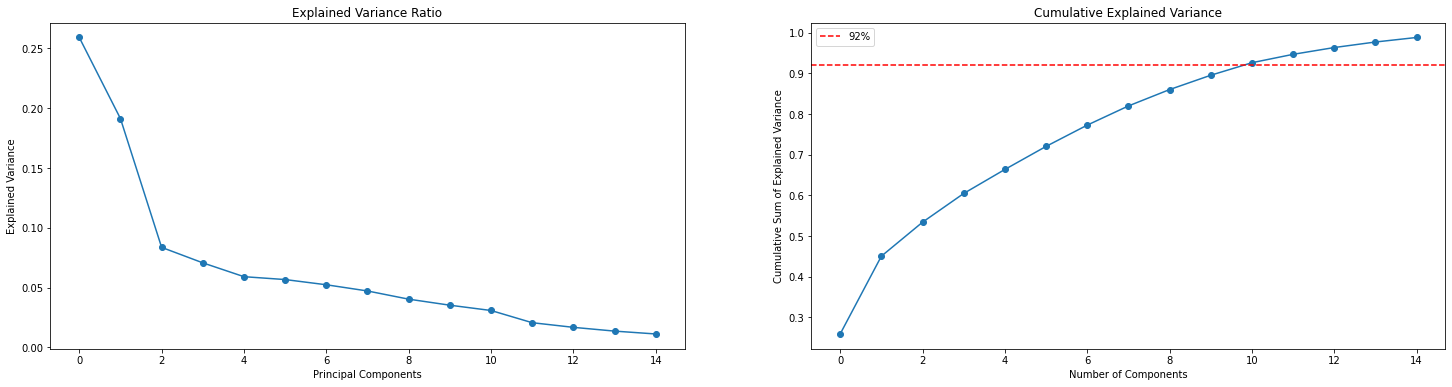

In [35]:
# Elbow method
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

plt.subplot(1, 2, 2)
cev = plt.plot(cumsum, marker='o')
plt.axhline(y=0.92, color='red', linestyle='--', label='92%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.legend()
plt.show()

Dapat dilihat dari grafic, Elbow terbaik didapat pada n_components = 9. Maka saya akan mengganti reduksi dimensinya menjadi 9

In [36]:
# PCA 9 dimensi
%%time
pca9 = PCA(n_components=9)

CPU times: user 16 µs, sys: 2 µs, total: 18 µs
Wall time: 23.6 µs


In [37]:
# Apply to train and test
%%time
trainPCA9 = pca9.fit_transform(trainScaled)
testPCA9 = pca9.transform(testScaled)

# convert to dataframe
trainPCADF = pd.DataFrame(trainPCA9, columns=['PCA_' + str(i) for i in range(1, 10)])
testPCADF = pd.DataFrame(testPCA9, columns=['PCA_' + str(i) for i in range(1, 10)])

# Display
trainPCADF

CPU times: user 23.7 ms, sys: 26.6 ms, total: 50.3 ms
Wall time: 33.8 ms


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,-0.016112,-1.757611,1.525132,-1.110591,-0.665067,0.011711,-0.406490,-1.368164,2.088839
1,0.245107,1.482471,-0.265320,1.251726,-0.889365,0.460350,-0.681371,-0.632137,0.287625
2,-1.831175,0.139791,0.076824,0.719919,-0.397224,1.307154,-0.799306,0.921860,0.295276
3,7.012957,-1.162377,0.562817,-1.063633,0.501378,-0.061147,0.625066,1.050037,0.051406
4,-1.224664,-0.147033,0.278239,1.000613,-0.175979,-1.511055,0.516667,0.428450,0.129721
...,...,...,...,...,...,...,...,...,...
4021,-1.433976,-0.966941,1.598909,1.037973,0.417314,-0.419955,0.392863,0.273310,-0.531752
4022,0.621097,-1.914977,-1.239820,-1.045736,0.760619,-1.014203,0.302109,0.526860,0.084493
4023,-1.276790,-0.607356,0.739203,1.091395,0.205887,-1.083955,0.047779,-0.113346,-0.313697
4024,0.608420,-2.057742,-0.202745,-2.147586,0.780664,0.179532,0.013439,-0.686039,1.236921


Berikut dataframe dari hasil reduksi dimensi dengan menggunakan 9 komponen

# **7 - Model Definition**

---

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Clustering model yang akan digunakan adalah
1. K-Means Clustering
2. Aglomerative Clustering
3. DBCAN Clustering

## 7.1 K-Means Clustering

In [38]:
# Cek inisialiasi K awal
%%time
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = [KMeans(n_clusters = k, random_state = 19).fit(trainPCADF).inertia_ for k in K]

CPU times: user 5.55 s, sys: 3.35 s, total: 8.9 s
Wall time: 4.72 s


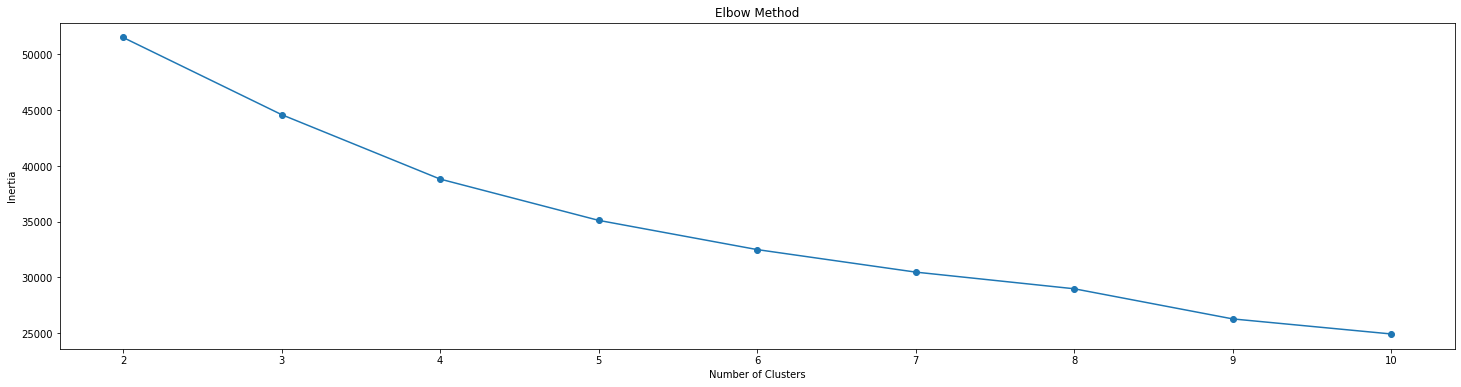

In [39]:
# Elbow Method
plt.figure(figsize=(25, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Jika dilihat cluster 3 dan 4 sudah cukup baik untuk dijadikan K-inisialisasi, namun akan saya bandingkan dengan nilai silhouette scorenya

In [40]:
# Dataframe to save silhoute score
%%time
kMeansScore = pd.DataFrame(columns=['K', 'Silhouette Score'])

CPU times: user 1.53 ms, sys: 887 µs, total: 2.42 ms
Wall time: 2.43 ms


In [41]:
# Function
%%time
for i in range(2, 11):
  kMeansScore.loc[i-2] = [i, round(silhouette_score(trainPCADF, 
                                                    KMeans(n_clusters = i, random_state = 19).fit(trainPCADF).labels_), 3)]

CPU times: user 8.43 s, sys: 4.34 s, total: 12.8 s
Wall time: 7.77 s


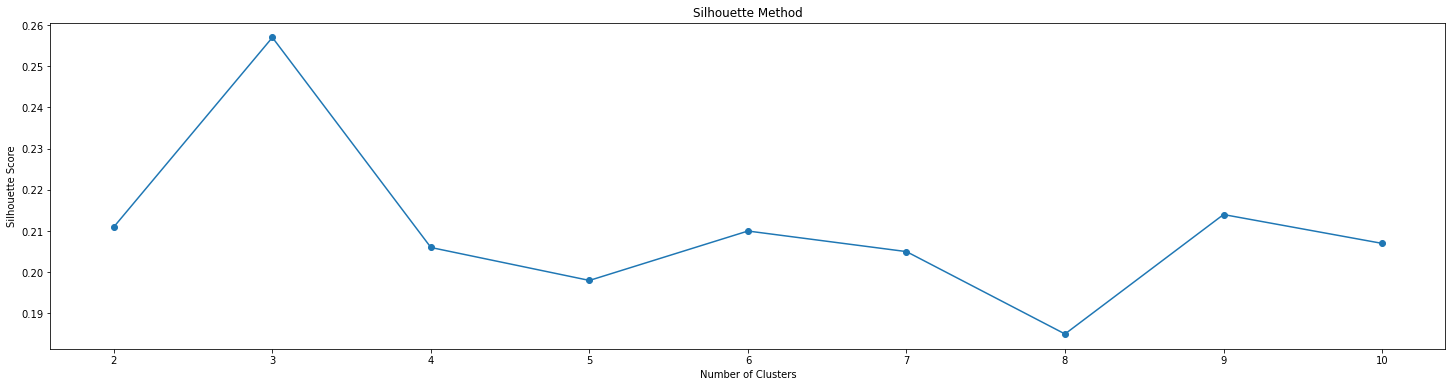

In [42]:
# Visualization Silhouette Score
plt.figure(figsize=(25, 6))
plt.plot(kMeansScore['K'], kMeansScore['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [43]:
# DataFrame of Silhouette Score
kMeansScore.sort_values(by='Silhouette Score', ascending=False)

,K,Silhouette Score
1,3.0,0.257
7,9.0,0.214
0,2.0,0.211
4,6.0,0.210
8,10.0,0.207
2,4.0,0.206
5,7.0,0.205
3,5.0,0.198
6,8.0,0.185


Didukung dari nilai silhoutte score nya, maka saya akan menggunakan n_cluster = 3 pada kmeans clustering

## 7.2 Aglomerative Clustering

In [44]:
# Dataframe to save value of aglomerative clustering
%%time
aggScore = pd.DataFrame(columns = ['n_clusters', 'Silhouette Score'])

# Function
for i in range(2, 11):
  aggScore.loc[i-2] = [i, round(silhouette_score(trainPCADF, 
                                                 AgglomerativeClustering(n_clusters = i, 
                                                                         linkage='ward').fit(trainPCADF).labels_), 3)]

CPU times: user 8.76 s, sys: 1.7 s, total: 10.5 s
Wall time: 9.42 s


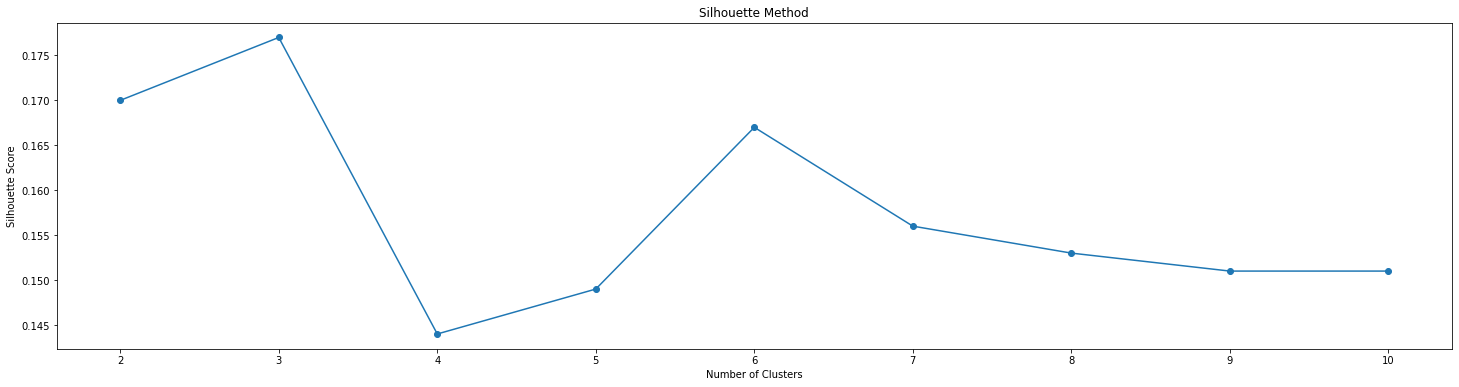

In [45]:
# Silhoutte score of agglomerative
plt.figure(figsize=(25, 6))
plt.plot(aggScore['n_clusters'], aggScore['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [46]:
# Dataframe of Silhouette Score in Aglomerative Clustering
aggScore.sort_values(by='Silhouette Score', ascending=False)

,n_clusters,Silhouette Score
1,3.0,0.177
0,2.0,0.170
4,6.0,0.167
5,7.0,0.156
6,8.0,0.153
7,9.0,0.151
8,10.0,0.151
3,5.0,0.149
2,4.0,0.144


Jika menggunakan Aglomerative, maka nilai silhouette nya berbeda, yaitu pada cluster ke 3 memiliki yang tertinggi dengan score **0.177**, maka saya akan membuat Agglomerative clustering dengan n_clusters = 3

## 7.3 DBSCAN Clustering

In [47]:
# Dataframe to save value of DBSCAN clustering with min samples 7
%%time
dbScan = DBSCAN(eps = 2, min_samples = 5)

CPU times: user 22 µs, sys: 5 µs, total: 27 µs
Wall time: 31.2 µs


# 8 - Model Training

---



Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 8.1 K-Means Clustering

In [48]:
# KMeans with n_cluster = 3
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(trainPCADF)

KMeans(n_clusters=3)

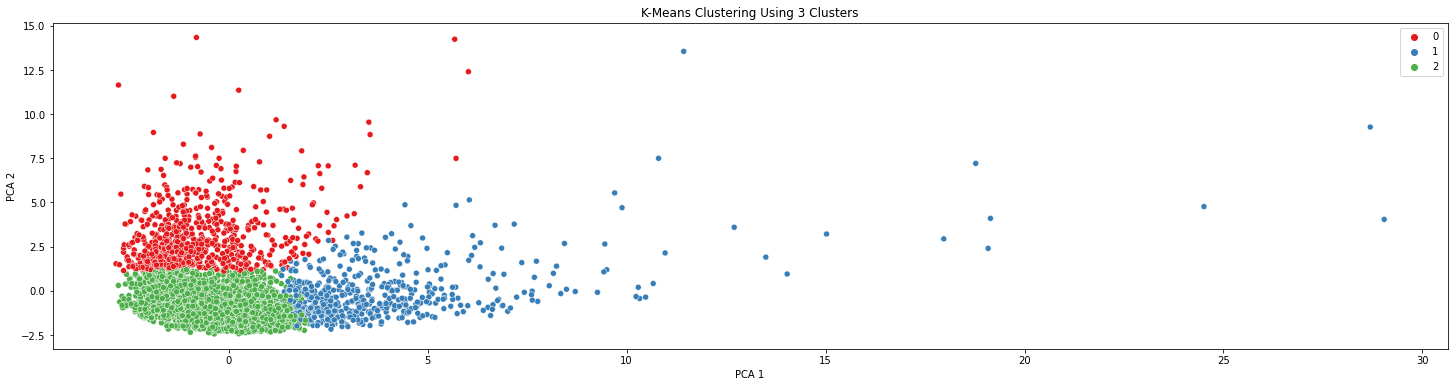

In [49]:
# Visualisasi of clustering
plt.figure(figsize=(25, 6))
sns.scatterplot(x=trainPCADF.PCA_1, y=trainPCADF.PCA_2, hue=kmeans3.labels_, data=trainPCADF, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Dapat dilihat persebaran data clustering terbagi menjadi 3, dimana mayoritas data saling berdekatan di ketiga cluster. lalu kemudian menyebar.

## 8.2 Aglomerative Clustering

In [50]:
# Agglomerative with 3 cluster
%%time
agg3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg3.fit(trainPCADF)

CPU times: user 640 ms, sys: 47.7 ms, total: 687 ms
Wall time: 698 ms


AgglomerativeClustering(n_clusters=3)

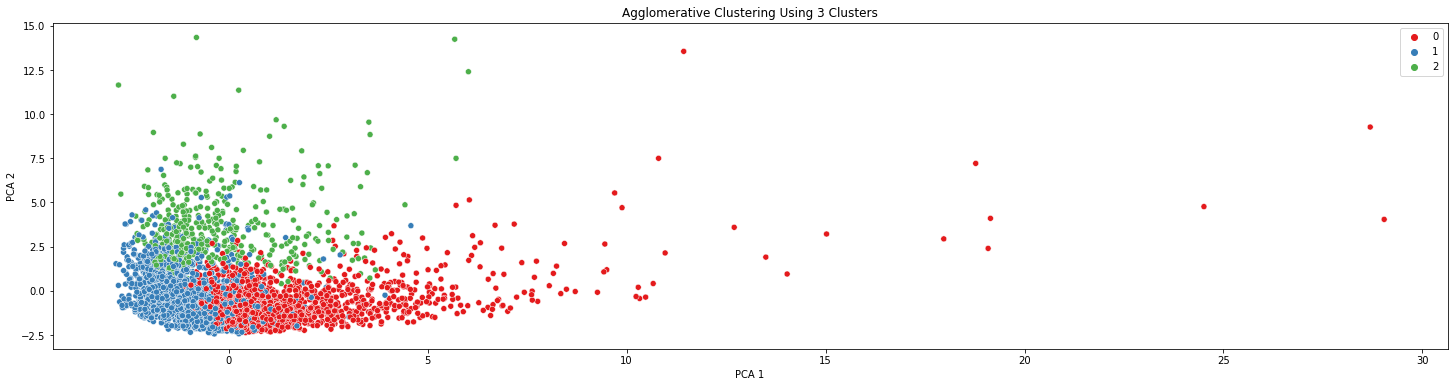

In [51]:
# Agglomerative Clustering Visualisazation
plt.figure(figsize=(25, 6))
sns.scatterplot(x = trainPCADF.PCA_1, y = trainPCADF.PCA_2, hue=agg3.labels_, data=trainPCADF, palette='Set1')
plt.title('Agglomerative Clustering Using 3 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Persebaran data clustering terbagi menjadi 3, dimana banyak data saling bertumpuk satu sama lain lalu kemudian menyebar.

## 8.3 DBSCAN Clustering

In [52]:
%%time
# DBSCAN Clustering with epsilon = 5 min_samples = 5
dbScan = DBSCAN(eps = 5, min_samples = 5)
dbScan.fit(trainPCADF)

CPU times: user 756 ms, sys: 95.5 ms, total: 852 ms
Wall time: 853 ms


DBSCAN(eps=5)

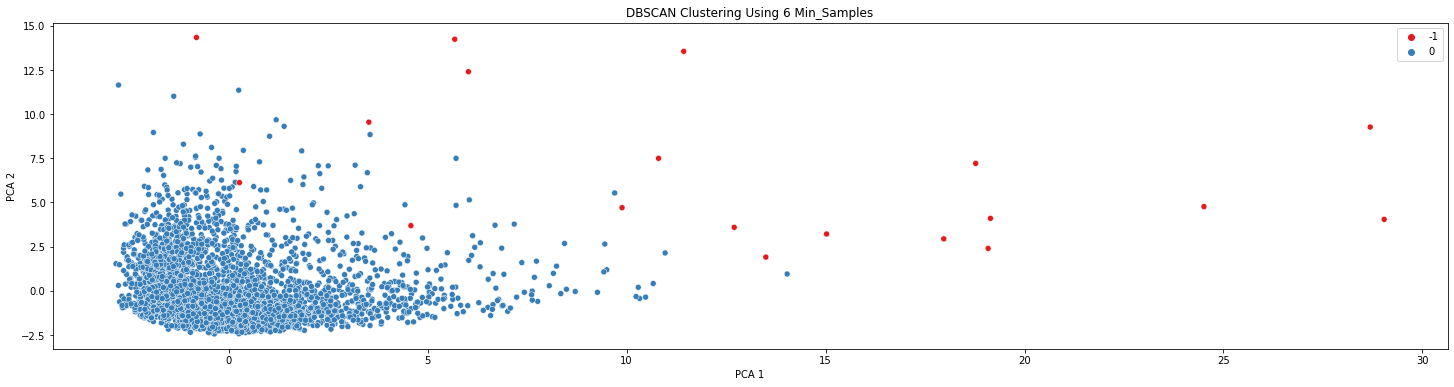

In [53]:
# DBSCAN Clustering Visualisazation
plt.figure(figsize=(25, 6))
sns.scatterplot(x = trainPCADF.PCA_1, y = trainPCADF.PCA_2, hue=dbScan.labels_, data=trainPCADF, palette='Set1')
plt.title('DBSCAN Clustering Using 6 Min_Samples')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Model hanya dapat membuat 1 cluster dan terlihat ada data-data outlier yang ditandai dengan warna merah. Kemungkinan ini terjadi karena tidak adanya penanganan outlier seperti yang sudah dijelaskan diatas

# **9 - Model Evaluation**

---

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

Evaluasi saya terhadap 3 jenis model clustering ini adalah Setelah dibuat 3 jenis Clustering, K-Means dan Agglomerative clustering dapat membuat 3 cluster data. Dari K-Means dapat dilihat clustering datanya cukup baik yang ditandai dengan tidak terlalu banyak cluster yang saling bertumpuk, walaupun sekilas masih ada cluster yang bertumpuk dengan cluster lain. Sedangkan jika Agglomerative Clustering banyak data yang bertumpuk walaupun model sudah dapat membagi menjadi 3 cluster data. Untuk DBSCAN menjadi yang memiliki performa rendah, karena hanya dapat menyatakan 1 cluster data dengan ditandai ada outlier-outlier.
Jika dilihat dari silhouette score, maka KMeans memiliki score yang tinggi yaitu **0.257** dengan 3 cluster data, maka saya akan mengaplikasikannya terhadap data test di model inference.

# **10 - Model Saving**

---

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [54]:
# Saving the model
with open('KMeans_Clustering.pkl', 'wb') as file1:
  pickle.dump(kmeans3, file1)

with open('Aglomerative_Clustering.pkl', 'wb') as file1:
  pickle.dump(agg3, file1)

with open('DBSCAN_Clustering.pkl', 'wb') as file1:
  pickle.dump(dbScan, file1)

with open('StandardScaler.pkl', 'wb') as file1:
  pickle.dump(scaler, file1)

# **11 - Model Inference**

---

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [55]:
# Display
infData = data.sample(30, random_state=19)

# Reset index
infData = infData.reset_index()

# Drop kolom index
infData.drop(columns=['index'], axis=1, inplace=True)

# Input 0 to missing value for train and test
infData['MINIMUM_PAYMENTS'].fillna(value=0, inplace=True)

# Display
infData

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5324,1671.319193,0.900000,0.00,0.00,0.00,970.624828,0.000000,0.000000,0.000000,0.500000,10,0,2000.0,436.679768,473.598415,0.000000,10
1,2082,15.730229,1.000000,163.24,55.00,108.24,0.000000,1.000000,0.083333,1.000000,0.000000,0,13,1200.0,179.844127,129.984859,0.166667,12
2,3514,27.585915,0.090909,0.00,0.00,0.00,1209.369868,0.000000,0.000000,0.000000,0.083333,1,0,11000.0,14176.748670,46.573054,0.000000,12
3,2606,258.837282,1.000000,831.60,0.00,831.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,51,2500.0,366.154670,173.631099,0.000000,12
4,3848,845.815387,1.000000,37.50,0.00,37.50,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,1000.0,0.000000,0.000000,0.000000,12
5,6132,453.347636,1.000000,4164.80,159.40,4005.40,0.000000,1.000000,0.166667,1.000000,0.000000,0,51,5500.0,4663.191280,168.550395,1.000000,12
6,2780,998.231433,1.000000,1622.23,872.26,749.97,0.000000,1.000000,0.916667,0.916667,0.000000,0,54,2500.0,987.085976,203.838712,0.000000,12
7,336,41.620283,1.000000,689.40,689.40,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,10000.0,718.158580,191.837369,1.000000,12
8,3884,52.598283,1.000000,517.83,0.00,517.83,0.000000,1.000000,0.000000,1.000000,0.000000,0,55,6500.0,600.096058,163.367227,1.000000,12
9,3170,176.478557,0.545455,600.00,600.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1500.0,690.478077,77.300437,0.000000,12


Saya ambil 30 data original secara acak untuk dibuat model prediksinya

In [56]:
# Scale the data inference
scaler.fit(infData)

# Apply to data
infDataScaled = scaler.transform(infData)

In [57]:
# PCA 9 Dimension applying
infDataPCA = pca9.transform(infDataScaled)

# convert to dataframe
infDataPCADF = pd.DataFrame(infDataPCA, columns=['PCA_' + str(i) for i in range(1, 10)])

# Display
infDataPCADF

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,-3.302636,5.199588,0.619688,-3.722715,-2.255459,0.490036,2.426882,0.252261,-0.024224
1,-0.441364,-1.559039,-0.961840,-0.606376,-0.166896,0.569642,-0.650649,0.577340,-0.273713
2,-1.737575,1.456358,4.060894,-0.053257,2.605372,-0.305129,-0.572407,-0.741542,-1.999687
3,0.399749,-1.322452,-1.203531,-0.402529,-0.053616,0.604429,-0.176033,0.772898,-0.873015
4,-2.000349,-0.421761,0.373969,1.021222,-0.489110,-0.042629,-0.077920,0.817037,-0.298842
5,2.527734,-1.294155,-0.277030,-1.314726,1.471457,-0.911802,0.566739,0.729389,-0.273924
6,1.363142,-0.948899,-1.019243,0.073901,-1.357897,0.206954,-0.554571,-0.165937,-0.513793
7,0.496847,-0.942670,0.727164,-0.072552,-0.959619,0.170834,-2.577494,-1.897603,1.127555
8,0.845670,-1.613764,-0.592878,-1.246859,0.726276,-0.511386,-0.715886,-0.267670,0.279197
9,-2.189060,-0.902757,1.908082,0.880944,0.295951,0.318206,-0.011880,0.374037,-0.726873


Berikut hasil PCA 9 dimensi

In [58]:
# apply model KMeans
infPred = kmeans3.predict(infDataPCADF)

# Display
infPred

array([0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 0, 2], dtype=int32)

Berikut hasil prediksi clustering dengan KMeans

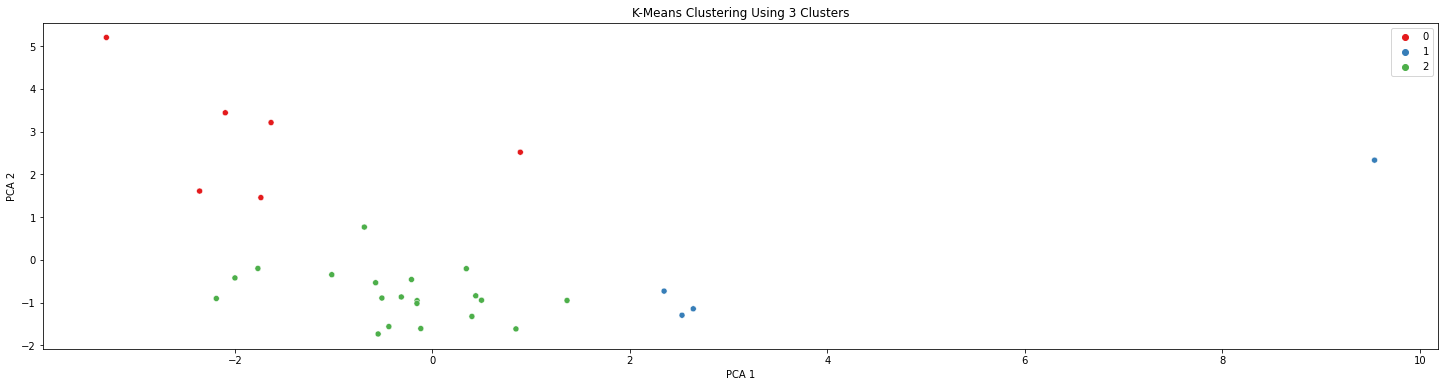

In [59]:
# Visualisasi of clustering
plt.figure(figsize=(25, 6))
sns.scatterplot(x = infDataPCADF.PCA_1, y = infDataPCADF.PCA_2, hue = infPred, data = infDataPCADF, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Berikut pembagian cluster terhadap data inference dimana titik merah merupakan cluster 0, titik biru merupakan cluster 1 dan titik hijau merupakan cluster 2

In [60]:
# Concate data inference and data prediction
infData['CLUSTER'] = infPred

# Display
infData

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,5324,1671.319193,0.900000,0.00,0.00,0.00,970.624828,0.000000,0.000000,0.000000,0.500000,10,0,2000.0,436.679768,473.598415,0.000000,10,0
1,2082,15.730229,1.000000,163.24,55.00,108.24,0.000000,1.000000,0.083333,1.000000,0.000000,0,13,1200.0,179.844127,129.984859,0.166667,12,2
2,3514,27.585915,0.090909,0.00,0.00,0.00,1209.369868,0.000000,0.000000,0.000000,0.083333,1,0,11000.0,14176.748670,46.573054,0.000000,12,0
3,2606,258.837282,1.000000,831.60,0.00,831.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,51,2500.0,366.154670,173.631099,0.000000,12,2
4,3848,845.815387,1.000000,37.50,0.00,37.50,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,1000.0,0.000000,0.000000,0.000000,12,2
5,6132,453.347636,1.000000,4164.80,159.40,4005.40,0.000000,1.000000,0.166667,1.000000,0.000000,0,51,5500.0,4663.191280,168.550395,1.000000,12,1
6,2780,998.231433,1.000000,1622.23,872.26,749.97,0.000000,1.000000,0.916667,0.916667,0.000000,0,54,2500.0,987.085976,203.838712,0.000000,12,2
7,336,41.620283,1.000000,689.40,689.40,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,10000.0,718.158580,191.837369,1.000000,12,2
8,3884,52.598283,1.000000,517.83,0.00,517.83,0.000000,1.000000,0.000000,1.000000,0.000000,0,55,6500.0,600.096058,163.367227,1.000000,12,2
9,3170,176.478557,0.545455,600.00,600.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1500.0,690.478077,77.300437,0.000000,12,2


Berikut adalah data prediction yang sudah digrouping dengan data inference

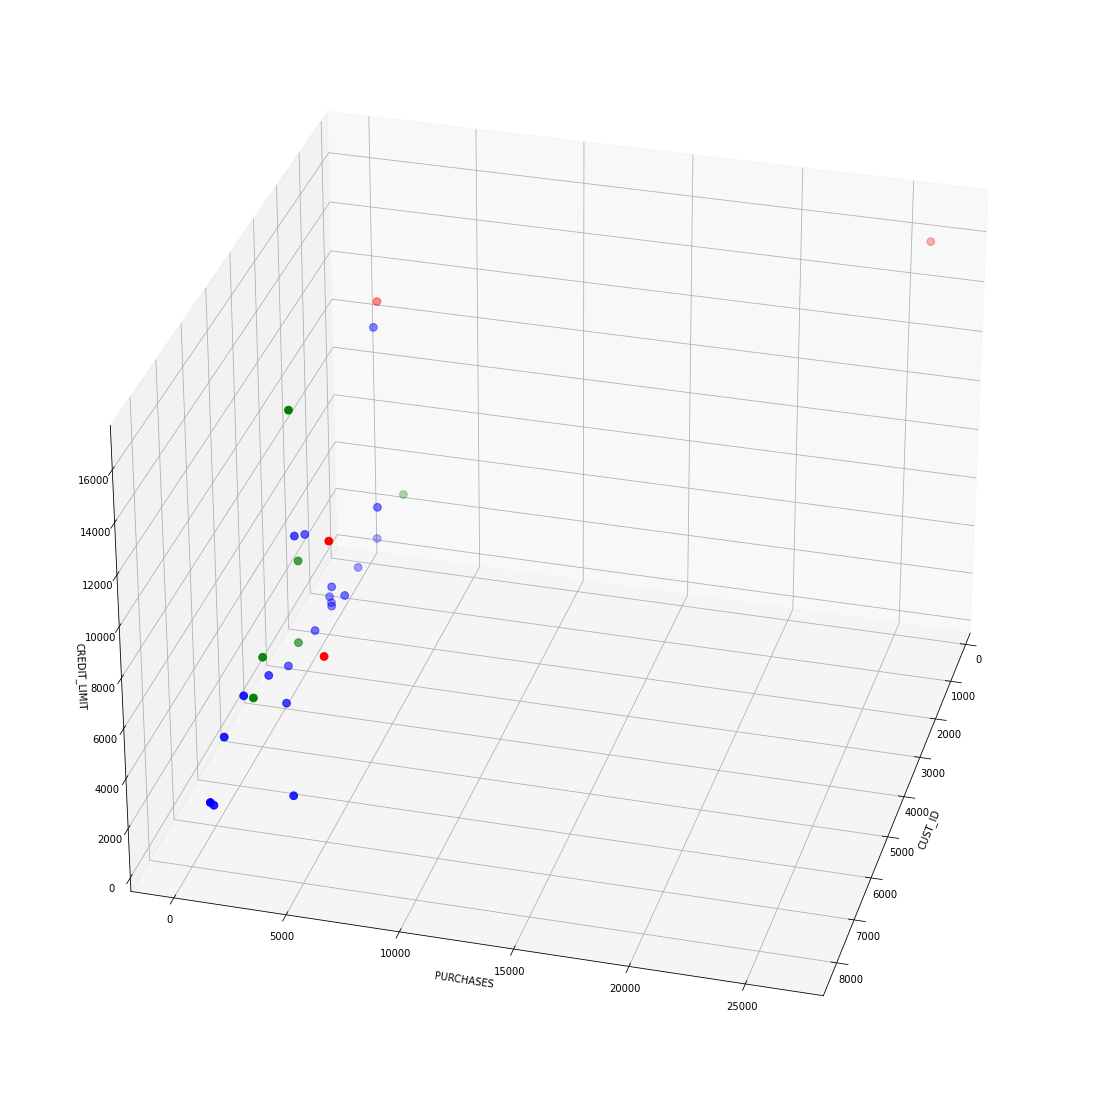

In [61]:
# 3D Plot data prediction between purchases and credit limit
fig = plt.figure(figsize=(60,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(infData.CUST_ID[infData.CLUSTER == 0], infData["PURCHASES"][infData.CLUSTER == 0], infData["CREDIT_LIMIT"][infData.CLUSTER == 0], c='green', s=60)
ax.scatter(infData.CUST_ID[infData.CLUSTER == 1], infData["PURCHASES"][infData.CLUSTER == 1], infData["CREDIT_LIMIT"][infData.CLUSTER == 1], c='red', s=60)
ax.scatter(infData.CUST_ID[infData.CLUSTER == 2], infData["PURCHASES"][infData.CLUSTER == 2], infData["CREDIT_LIMIT"][infData.CLUSTER == 2], c='blue', s=60)
ax.view_init(30, 15)
plt.xlabel("CUST_ID")
plt.ylabel("PURCHASES")
ax.set_zlabel('CREDIT_LIMIT') 
plt.show()

Berikut terlihat banyak data cluster 0-2 yang menggunakan kartu kreditnya hanya sampai +-`$ 2.600`, sementara yang menggunakan kartu kreditnya diatas `$ 25.000` hanya ada 1 pelanggan saja. Perlu dievaluasi untuk pelanggan ini, apakah benar pelanggan ini menggunakan nilai sebesar itu untuk berbelanja atau memang ada penyalahgunaan atas kartu kreditnya

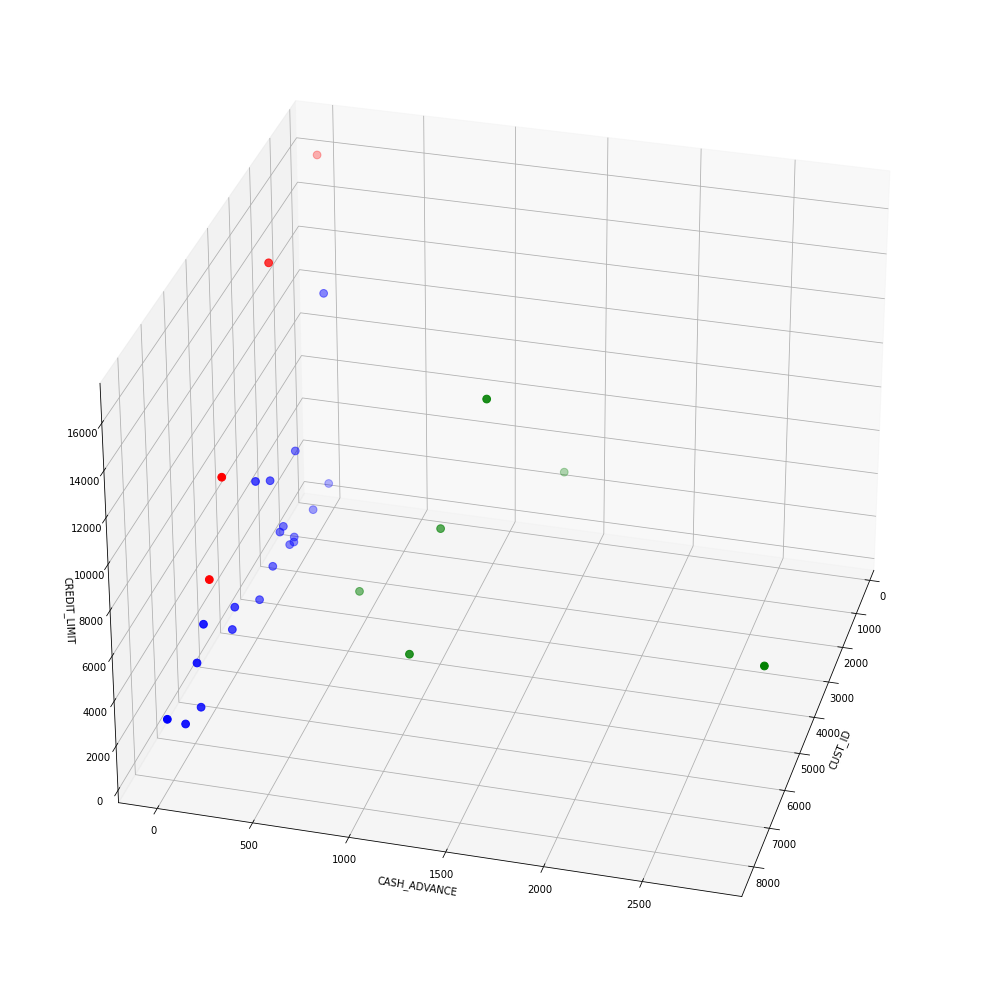

In [62]:
# 3D Plot data prediction between cash advance and credit limit
fig = plt.figure(figsize=(60,18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(infData.CUST_ID[infData.CLUSTER == 0], infData["CASH_ADVANCE"][infData.CLUSTER == 0], infData["CREDIT_LIMIT"][infData.CLUSTER == 0], c='green', s=60)
ax.scatter(infData.CUST_ID[infData.CLUSTER == 1], infData["CASH_ADVANCE"][infData.CLUSTER == 1], infData["CREDIT_LIMIT"][infData.CLUSTER == 1], c='red', s=60)
ax.scatter(infData.CUST_ID[infData.CLUSTER == 2], infData["CASH_ADVANCE"][infData.CLUSTER == 2], infData["CREDIT_LIMIT"][infData.CLUSTER == 2], c='blue', s=60)
ax.view_init(30, 15)
plt.xlabel("CUST_ID")
plt.ylabel("CASH_ADVANCE")
ax.set_zlabel('CREDIT_LIMIT')
plt.show()

Banyak data di cluster 0 - 1 yang menggunakan kartu kreditnya untuk CASH_ADVANCE sampai kurang dari `$ 500`. Sementara yang CASH_ADVANCE lebih dari `$ 2.500` hanya ada 1 pelanggan. Perlu dievaluasi lebih lanjut apakah para pelanggan ini benar melakukan CASH_ADVANCE atau tidak. Atau mungkin pelanggan ini sedang mengalami financial problem sehingga melakukan CASH_ADVANCE yang cukup besar.

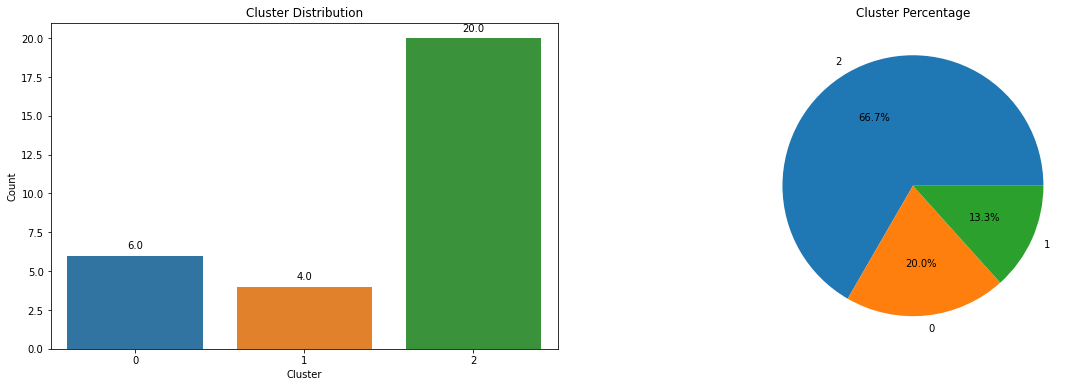

In [63]:
# Clustering visualization
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='CLUSTER', data=infData)
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(infData['CLUSTER'].value_counts(), labels=infData['CLUSTER'].value_counts().index, autopct='%1.1f%%')
plt.title('Cluster Percentage')
plt.show()

cluster 0 ada sebanyak **20%**, cluster 1 ada sebanyak **66.7%** dan cluster 2 ada sebanyak **13.3%**. Banyak dari data yang masuk ke dalam cluster 0 dengan menggunakan model KMeans 3 cluster.

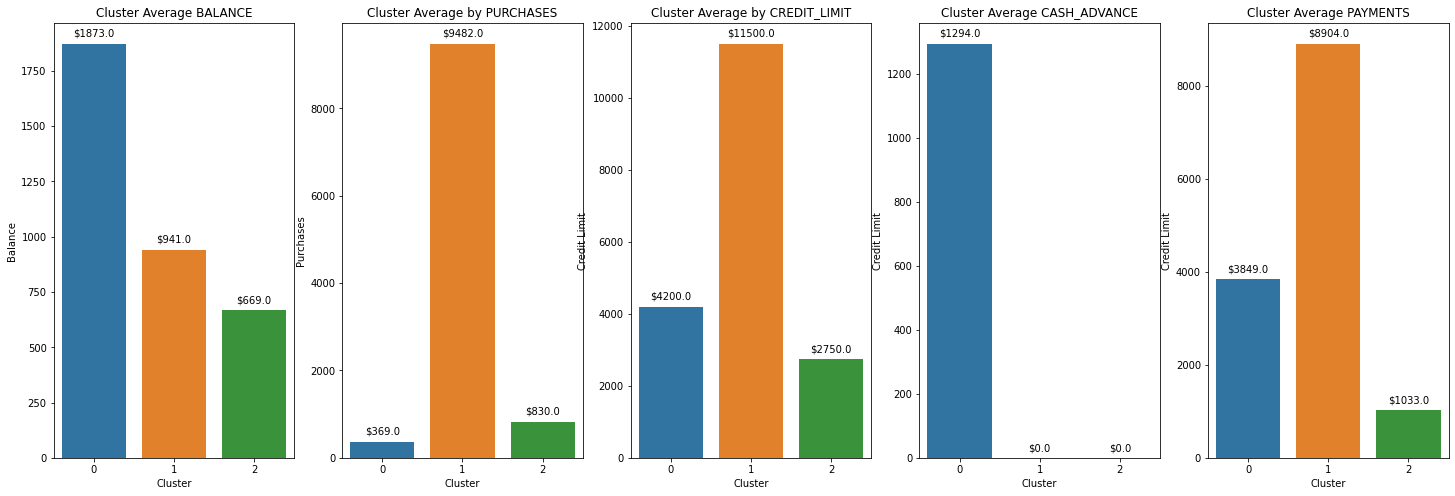

In [64]:
# Visualization Cluster By Balances
plt.figure(figsize=(25, 8))
plt.subplot(1, 5, 1)
fig = sns.barplot(x='CLUSTER', y='BALANCE', data=infData, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average BALANCE')
plt.xlabel('Cluster')
plt.ylabel('Balance')

# Visualization Cluster By Purchases
plt.subplot(1, 5, 2)
fig = sns.barplot(x='CLUSTER', y='PURCHASES', data=infData, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average by PURCHASES')
plt.xlabel('Cluster')
plt.ylabel('Purchases')

# Visualization Cluster By CREDIT_LIMIT 
plt.subplot(1, 5, 3)
fig = sns.barplot(x='CLUSTER', y='CREDIT_LIMIT', data=infData, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average by CREDIT_LIMIT')
plt.xlabel('Cluster')
plt.ylabel('Credit Limit')

# Visualization Cluster By Cash Advanced
plt.subplot(1, 5, 4)
fig = sns.barplot(x='CLUSTER', y='CASH_ADVANCE', data=infData, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average CASH_ADVANCE')
plt.xlabel('Cluster')
plt.ylabel('Credit Limit')

# Visualization Cluster By Payment
plt.subplot(1, 5, 5)
fig = sns.barplot(x='CLUSTER', y='PAYMENTS', data=infData, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average PAYMENTS')
plt.xlabel('Cluster')
plt.ylabel('Credit Limit')
plt.show()

Dari visualisasi diatas :
1. Pada data `BALANCE` cluster 0 merupakan yang tebanyak dengan nilai averagenya `$ 1.873` sedangkan cluster 1 yang paling sedikit dengan nilai averagenya `$ 669`
2. Pada data `PURCHASES` cluster 2 merupakan yang terbanyak menggunakan kartu kreditnya dengan total average `$ 9.482` dan cluster 0 dengan total average `$ 369`, begitupun cluster 1 yang nilainya `$ 890`. Pihak penyedia kartu kredit mungkin bisa memberikan semacam hadiah atau souvenir sebagai bentuk apresiasi kepada cluster 2 ini karena pelanggan di cluster ini merupakan pelanggan yang mayoritas sering menggunakan kartu kredit sehingga nantinya para pelanggan dapat semakin meningkatkan penggunaan kartu kreditnya. Sedangkan untuk cluster 0 yang paling sedikit dan cluster 1 yang selisihnya 2 kali dari cluster 0, mungkin pihak penyedia layanan kartu kredit dapat memberikan kupon diskon ataupun penawaran bundling terhadap suatu pembelian sehingga transaksi di cluster 0 ini dapat semakin meningkat.
3. Pengguna kartu kredit di cluster 2 paling banyak menggunakan kredit limitnya dengan total average `$ 11.500` sedangkan cluster 1 yang paling sedikit dengan penggunaan `$ 4.200`
4. Cluster 0 merupakan cluster yang paling banyak menggunakan **CASH ADVANCE** sehingga penyedia layanan harus memperhatikan apakah di cluster 0 ini para customer dapat membayar penuh terhadap tagihan, atau mungkin bisa dibuatkan fraud sistem untuk kedepannya agar bisa memonitor apakah para pelanggan di cluster 0 ini terdeteksi melakukan kecurangan atau tidak. Karena saya berasumsi jika para user yang sudah memiliki kartu kredit juga sudah mempunyai penghasilan yang cukup atau bisa dikatakan sama dengan limit credit yang penyedia layanan berikan, sehingga jika para pelanggan di cluster 0 ini sering melakukan **CASH ADVANCE** maka seharusnya penyedia layanan harus lebih memperhatikan cluster ini apakah benar pelanggan di cluster ini memberikan data yang valid atau tidak pada saat pengajuan kartu kredit. 
5. Cluster 2  merupakan pelanggan yang paling sering membayar tagihan kartu kreditnya dengan total average `$ 8.904`

# **12 - Conceptual Problems**


---



Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
  - Inertia pada algoritma K-Means merupakan suatu metrik untuk mengukur seberapa baik suatu model K-Means dalam melakukan pengelompokan pada data. Inertia dihitung melalui total jarak kuadrat dari titik data dengan centroid yang telah ditetapkan. Semakin rendah nilai dari Inertia maka model akan semakin baik dalam pengelompokan data, akan tetapi perlu diperhatikan juga dalam memilih nilai clusternya. Jika menggunakan elbow method maka inertia dipilih dari penurunan inertia yang mulai melambat. Sedangkan jika menggunakan silhouette score, maka nilai silhouette score yang tertinggilah yang dipilih sebagai nilai cluster yang kemudian diterapkan di model.
2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
  - Elbow Method adalah salah satu teknik yang digunakan untuk menentukan jumlah optimal dari cluster pada algoritma K-Means. Penggunaan Elbow Method dilakukan dengan cara memplot grafik nilai Inertia (SSE) terhadap jumlah cluster (K) yang berbeda, kemudian menentukan jumlah cluster (K) yang optimal pada titik di mana nilai Inertia (SSE) mulai menurun dengan kecepatan yang lebih lambat. 
  - Kelebihan dari Elbow Method adalah metode ini cukup sederhana dan mudah dipahami, serta cukup cepat dalam menentukan jumlah optimal dari cluster. Selain itu, metode ini dapat memberikan hasil yang konsisten apabila dilakukan pada data yang berbeda dengan parameter yang sama.
  - Kelemahan dari Elbow Method, yaitu:

    1. Terkadang sulit untuk menentukan titik elbow (atau siku) pada grafik, karena titik ini mungkin tidak selalu jelas terlihat.

    2. Elbow Method hanya dapat digunakan untuk algoritma clustering yang menggunakan Inertia (SSE) sebagai metrik untuk mengukur performa clustering, sehingga tidak dapat digunakan pada algoritma clustering yang menggunakan metrik lain, seperti Silhouette Score atau Calinski-Harabasz Index.

    3. Terdapat kasus di mana grafik nilai Inertia (SSE) tidak membentuk siku, sehingga sulit untuk menentukan jumlah optimal dari cluster.

  - Alasan saya menggunakan Elbow method dalam model ini karena mudah dalam penerapan walaupun jika grafiknya tidak membentuk siku yang jelas, akan tetapi saya bisa asumsikan di awal berapa nilai cluster yang optimal untuk dijadikan model. Jika masih belum yakin maka saya akan menggunakan nilai silhouette score sebagai pendukung dari elbow method tersebut.

# **13 - Pengambilan Kesimpulan**

---


Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Dari dataset dan clustering model diatas, dapat disimpulkan :
1. Model KMeans clustering dengan nilai cluster = 3 menjadi model yang terbaik diantara Aglomerative clustering dan DBSCAN clustering. Hal ini dibuktikan dengan adanya pembagian cluster yang tidak terlalu banyak data yang bertumpuk dengan cluster yang lain.
2. Pelanggan dengan cluster 2 adalah pelanggan yang paling banyak menggunakan kartu kreditnya untuk digunakan dan pelanggan di cluster 2 juga lah yang paling banyak melunasi tagihan kartu kreditnya sehingga mungkin pihak penyedia bisa memberikan semacam hadiah atau apresiasi agar para pelanggan di cluster 2 ini dapat semakin sering menggunakan dan membayar tagihan kartu kreditnya.
3. Perlunya dievaluasi lebih lanjut pelanggan yang paling banyak menggunakan kartu kreditnya sebagai `CASH_ADVANCE`. Saya berasumsi ada masalah financial yang melanda para pelanggan ini yang mungkin akan dikhawatirkan akan adanya penunggakan atau gagal bayar terhadap tagihan.
4. DBSCAN model hanya mampu memprediksi 1 jenis cluster dan beberapa outlier, sehingga model jenis ini kurang dapat mempresentasikan data-data pelanggan yang masuk ke dalam jenis cluster yang lebih jelas.